In [27]:
import random
from pyomo.environ import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import my_functions
import time

In [28]:
data = [{1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579},
{1: 1966.7553838908016, 2: 1801.0366774848985, 3: 1819.712196731638, 4: 1775.287803268362, 5: 1728.2446161091984, 6: 1743.7471265933443, 7: 1733.2386458471083, 8: 1729.2543443246534, 9: 1677.202345638219, 10: 1696.1902784139372, 11: 1693.3974000078847, 12: 1646.7456556753466, 13: 1630.9633225151015, 14: 1601.7613541528917, 15: 1596.8097215860628, 16: 1586.2528734066557, 17: 1601.797654361781, 18: 1564.6025999921153},
{1: 1973.1094286186888, 2: 1795.031379191242, 3: 1834.8346808038111, 4: 1746.0541247548374, 5: 1720.4975034565157, 6: 1741.0265043839115, 7: 1718.116161774935, 8: 1720.4273496737387, 9: 1670.8483009103318, 10: 1698.91090062337, 11: 1699.4026983015412, 12: 1663.8907436677553, 13: 1629.2883442922907, 14: 1630.9950326664164, 15: 1579.6646335936541, 16: 1593.9999860593384, 17: 1603.4726325845918, 18: 1573.42959464303},
{1: 1976.8724759522759, 2: 1771.9474062134493, 3: 1803.188973491949, 4: 1721.4106616114752, 5: 1719.2846788120107, 6: 1764.1104773617042, 7: 1733.11139585434, 8: 1733.4546820080498, 9: 1665.3829148098089, 10: 1715.0503960576482, 11: 1700.6155229460462, 12: 1688.5342068111174, 13: 1614.293110212886, 14: 1614.8555372321382, 15: 1575.901586260067, 16: 1580.9726537250274, 17: 1635.118339896454, 18: 1578.8949807435529},
{1: 1964.777344815212, 2: 1785.9984516276656, 3: 1811.8965672638915, 4: 1741.0445761885971, 5: 1734.5322783128245, 6: 1774.3556396871275, 7: 1744.632585389314, 8: 1745.5498131451136, 9: 1651.3318693955925, 10: 1695.4164814805263, 11: 1695.7461906486649, 12: 1704.3553770472142, 13: 1619.1624425102673, 14: 1599.0343669960414, 15: 1564.3803967250929, 16: 1572.2650599530848, 17: 1619.8707403956403, 18: 1568.6498184181296},
{1: 1954.7957824278174, 2: 1763.0573016462833, 3: 1825.8964066922397, 4: 1721.251111258845, 5: 1757.4734282942068, 6: 1784.337202074522, 7: 1764.4260503190662, 8: 1722.6837704619516, 9: 1633.8747267687422, 10: 1718.2825241636883, 11: 1713.2033332755152, 12: 1690.355537618866, 13: 1616.2750177220087, 14: 1577.4964438684815, 15: 1547.5477914564572, 16: 1593.8029830806447, 17: 1636.703345664276, 18: 1571.5372432063882},
{1: 1939.783667454154, 2: 1786.6356771471615, 3: 1802.3180311913616, 4: 1714.2268786167479, 5: 1730.644204172699, 6: 1800.2986797666351, 7: 1762.034666673259, 8: 1725.0751541077589, 9: 1660.70395089025, 10: 1696.6783709136462, 11: 1697.2418555834022, 12: 1711.9596908689082, 13: 1631.287132695672, 14: 1600.8720543225852, 15: 1528.9265449263992, 16: 1600.8272157227418, 17: 1613.3277352101722, 18: 1590.1584897364462},
{1: 1904.7617378916948, 2: 1763.1285932487467, 3: 1811.4264223554653, 4: 1708.576616092524, 5: 1745.0757274969894, 6: 1812.66915910635, 7: 1759.1719143190664, 8: 1748.5822380061736, 9: 1648.3334715505353, 10: 1691.296584375848, 11: 1688.2458414905775, 12: 1714.8224432231007, 13: 1616.8556093713814, 14: 1635.8939838850445, 15: 1537.9225590192239, 16: 1606.20900226054, 17: 1618.977997734396, 18: 1581.0500985723424},
{1: 1914.533111324227, 2: 1771.7195203208785, 3: 1784.6184695861755, 4: 1698.8052426599918, 5: 1768.9183594948045, 6: 1788.826527108535, 7: 1775.3136564142458, 8: 1721.449437232082, 9: 1666.526401863338, 10: 1675.1548422806686, 11: 1715.0537942598673, 12: 1708.7661665035193, 13: 1598.6626790585788, 14: 1652.7628795983808, 15: 1529.331631947092, 16: 1612.2652789801214, 17: 1646.1107985084877, 18: 1564.1812028590061},
{1: 1907.3847200642301, 2: 1766.299655309375, 3: 1791.7668608461724, 4: 1711.4215430844902, 5: 1736.964039579663, 6: 1798.8561151054425, 7: 1766.5611315934668, 8: 1741.0813160074179, 9: 1665.7345240258392, 10: 1680.574707292172, 11: 1695.4219154845314, 12: 1685.1980301430503, 13: 1588.6330910616712, 14: 1653.5547574358795, 15: 1561.2859518622336, 16: 1621.0178038009003, 17: 1669.6789348689567, 18: 1551.5649024345078},
{1: 1919.6948364533644, 2: 1778.392159361368, 3: 1772.1748944997098, 4: 1692.8892441276203, 5: 1755.496338536533, 6: 1818.4480814519052, 7: 1754.2510152043326, 8: 1736.8107462486012, 9: 1670.0050937846559, 10: 1699.9477017497823, 11: 1713.0234463504041, 12: 1697.863649234267, 13: 1607.062106183003, 14: 1635.9532265700068, 15: 1542.8569367409018, 16: 1608.9252997489075, 17: 1650.3059404113465, 18: 1538.899283343291},
{1: 1928.417541975732, 2: 1770.6231777854084, 3: 1783.3265422262227, 4: 1691.573828220651, 5: 1774.4217452478063, 6: 1785.2435511402314, 7: 1768.4398118715108, 8: 1717.8853395373278, 9: 1671.3205096916251, 10: 1720.7000469423592, 11: 1692.2711011578272, 12: 1689.1409437118994, 13: 1595.91045845649, 14: 1643.7222081459663, 15: 1576.0614670525756, 16: 1624.9479894617282, 17: 1636.1171437441683, 18: 1522.8765936304703},
{1: 1937.7070552882362, 2: 1786.1496590064571, 3: 1802.8140531199222, 4: 1676.0473469996023, 5: 1754.9342343541068, 6: 1801.4139613528955, 7: 1776.2666405257892, 8: 1701.7149293246637, 9: 1685.9703543233195, 10: 1711.410533629855, 11: 1692.0909196859357, 12: 1689.3211251837909, 13: 1618.6454810148664, 14: 1620.98718558759, 15: 1561.4116224208813, 16: 1605.5907162708284, 17: 1655.4744169350681, 18: 1515.049764976192},
{1: 1942.8581371593482, 2: 1800.7157235557515, 3: 1810.79276410335, 4: 1702.9663177918876, 5: 1767.584218087493, 6: 1774.4949905606102, 7: 1791.5137304568477, 8: 1717.0221502440224, 9: 1707.432197108183, 10: 1689.9486908449917, 11: 1676.843829754877, 12: 1674.7550606344964, 13: 1603.3382600955076, 14: 1608.3372018542038, 15: 1553.4329114374534, 16: 1600.4396343997164, 17: 1667.8041115966985, 18: 1502.7200703145616},
{1: 1949.671066127184, 2: 1820.18613807776, 3: 1785.012382128382, 4: 1721.4654136513932, 5: 1782.3641699061247, 6: 1765.598322019176, 7: 1772.0433159348393, 8: 1688.2444708714393, 9: 1733.212579083151, 10: 1660.1057863795156, 11: 1658.3447338953715, 12: 1659.9751088158646, 13: 1623.1714056588157, 14: 1617.233870395638, 15: 1582.2105908100366, 16: 1580.6064888364083, 17: 1660.9911826288626, 18: 1532.5629747800376},
{1: 1952.9947203122529, 2: 1831.6138189445635, 3: 1759.5816789385026, 4: 1735.9534359697657, 5: 1775.603194319379, 6: 1745.9692831426257, 7: 1791.6723548113896, 8: 1713.6751740613186, 9: 1749.058044460378, 10: 1666.8667619662613, 11: 1633.9429725907496, 12: 1644.1296434386377, 13: 1608.6833833404432, 14: 1595.2245697016324, 15: 1604.2198915040422, 16: 1605.0082501410302, 17: 1649.563501762059, 18: 1529.2393205949688},
{1: 1946.2785224427835, 2: 1838.330016814033, 3: 1770.7683462167704, 4: 1754.6727508789882, 5: 1783.4010487646644, 6: 1760.2692405481494, 7: 1769.2315056758239, 8: 1694.955859152096, 9: 1771.4988935959436, 10: 1663.5484201413515, 11: 1654.8415571594717, 12: 1629.829686033114, 13: 1612.001725165353, 14: 1584.0379024233646, 15: 1624.2652729972933, 16: 1584.962868647779, 17: 1628.664917193337, 18: 1521.4414661496835},
{1: 1932.574819444348, 2: 1843.8874487083986, 3: 1784.7850192610472, 4: 1767.4996264690958, 5: 1782.5858362204945, 6: 1773.0361568743572, 7: 1770.0467182199939, 8: 1668.7793314253463, 9: 1781.6862312171847, 10: 1649.5317470970747, 11: 1668.5452601579073, 12: 1628.804325884351, 13: 1613.027085314116, 14: 1610.2144301501144, 15: 1611.4383974071857, 16: 1574.775531026538, 17: 1615.8980008671292, 18: 1515.8840342553178},
{1: 1924.4399485568858, 2: 1852.26084503851, 3: 1803.7908122178485, 4: 1748.4938335122945, 5: 1790.7207071079565, 6: 1782.7195747378444, 7: 1781.4444748120532, 8: 1686.4882859796571, 9: 1752.8066347066692, 10: 1667.3476624241252, 11: 1660.282414625345, 12: 1611.0953713300403, 13: 1604.6536889840045, 14: 1598.816673558055, 15: 1593.6224820801351, 16: 1565.0921131630507, 17: 1644.7775973776447, 18: 1524.1468797878802},
{1: 1935.2922342713746, 2: 1842.2121414711387, 3: 1822.5062245037993, 4: 1720.3739484297384, 5: 1799.2952366844243, 6: 1796.3120368429713, 7: 1762.7290625261023, 8: 1677.7686929076467, 9: 1741.9543489921805, 10: 1653.7552003189983, 11: 1670.3311181927163, 12: 1590.0903980841736, 13: 1586.9531930734997, 14: 1626.936558640611, 15: 1614.6274553260018, 16: 1556.517583586583, 17: 1662.4780932881495, 18: 1532.8664728598908},
{1: 1940.7464586537199, 2: 1819.5851843665737, 3: 1833.8947952694834, 4: 1733.2070410006354, 5: 1772.194618569806, 6: 1818.9389939475363, 7: 1773.3938024547742, 8: 1651.059124759921, 9: 1731.1877189827178, 10: 1672.214454084939, 11: 1697.4317363073346, 12: 1577.2573055132766, 13: 1576.2884531448278, 14: 1608.4773048746704, 15: 1609.1732309436566, 16: 1583.2271517343088, 17: 1651.0895225224654, 18: 1543.6331028693535},
{1: 1907.0963726572973, 2: 1834.6036474230964, 3: 1841.538297534979, 4: 1709.73165390988, 5: 1785.4925107035367, 6: 1805.7437314879146, 7: 1784.5868043123805, 8: 1684.7092107563435, 9: 1716.169255926195, 10: 1695.6898411756945, 11: 1670.7276771371703, 12: 1559.0496516197345, 13: 1602.9925123149922, 14: 1626.6849587682125, 15: 1597.9802290860503, 16: 1575.5836494688133, 17: 1637.7916303887346, 18: 1556.8283653289752},
{1: 1921.4220971420048, 2: 1851.7952627983605, 3: 1848.1127161687275, 4: 1713.9752047335744, 5: 1768.3008953282726, 6: 1791.418007003207, 7: 1780.343253488686, 8: 1665.3410962791984, 9: 1733.5682428017692, 10: 1715.0579556528396, 11: 1653.3286902615962, 12: 1552.475232985986, 13: 1580.3506194299912, 14: 1603.7643609997233, 15: 1580.261979796742, 16: 1598.5042472373025, 17: 1655.5098796780428, 18: 1579.470258213976},
{1: 1926.346229602531, 2: 1831.5832863120193, 3: 1868.3246926550687, 4: 1727.5625510166367, 5: 1766.3081570026307, 6: 1783.8626560761877, 7: 1773.954822213711, 8: 1671.7295275541735, 9: 1735.5609811274112, 10: 1726.327115128363, 11: 1660.8840411886156, 12: 1541.2060735104626, 13: 1575.426486969465, 14: 1626.721241775988, 15: 1560.2164047177714, 16: 1584.9169009542402, 17: 1632.5529989017782, 18: 1599.5158332929466},
{1: 1932.3964889513136, 2: 1842.9800356254984, 3: 1855.3432453004964, 4: 1742.2257322986695, 5: 1756.306725087042, 6: 1781.0999639156462, 7: 1782.2564777456648, 8: 1660.3327782406943, 9: 1738.3236732879527, 10: 1718.6084735744237, 11: 1635.2460439363133, 12: 1532.9044179785087, 13: 1585.4279188850537, 14: 1620.6709824272052, 15: 1585.8544019700737, 16: 1592.6355425081795, 17: 1617.8898176197454, 18: 1612.497280647519},
{1: 1902.4257780953556, 2: 1810.3963220635212, 3: 1864.134222711984, 4: 1772.1964431546276, 5: 1737.731520943074, 6: 1799.6751680596142, 7: 1778.633047720019, 8: 1657.9016464593126, 9: 1750.0496346943664, 10: 1722.2319036000695, 11: 1626.4550665248257, 12: 1556.30933799347, 13: 1573.70195747864, 14: 1620.2005531156744, 15: 1618.438115532051, 16: 1569.230622493218, 17: 1620.320949401127, 18: 1612.9677099590497},
{1: 1920.2304205554008, 2: 1785.4273702069277, 3: 1846.3295802519388, 4: 1783.6225368937064, 5: 1731.1221523530699, 6: 1808.2363415910538, 7: 1767.8535644716155, 8: 1656.096362836514, 9: 1742.9045354856212, 10: 1747.2008554566628, 11: 1628.2603501476244, 12: 1579.9530080713955, 13: 1565.1407839472004, 14: 1627.3456523244197, 15: 1625.047484122055, 16: 1580.0101057416216, 17: 1596.6772793232017, 18: 1601.5416162199708},
{1: 1931.9811551768953, 2: 1794.811656140562, 3: 1864.1455018941124, 4: 1800.6231660628944, 5: 1714.121523183882, 6: 1790.4204199488802, 7: 1756.102829850121, 8: 1680.9919912439632, 9: 1718.008907078172, 10: 1739.0403182119435, 11: 1648.2076960299682, 12: 1601.194151310321, 13: 1588.5555171269339, 14: 1607.3983064420759, 15: 1601.6327509423215, 16: 1570.6258198079872, 17: 1604.837816567921, 18: 1580.3004729810452},
{1: 1917.1666761070596, 2: 1804.9606955140591, 3: 1850.94100924852, 4: 1795.9551547789458, 5: 1712.220193131423, 6: 1780.5096568667166, 7: 1767.9067487668406, 8: 1682.893321296422, 9: 1722.6769183621204, 10: 1733.927530254722, 11: 1653.3204839871898, 12: 1616.0086303801568, 13: 1601.7600097725262, 14: 1597.2492670685788, 15: 1611.5435140244851, 16: 1551.1825937135218, 17: 1593.0338976512014, 18: 1599.7436990755107},
{1: 1887.498782123874, 2: 1784.4424109820511, 3: 1863.3545154497995, 4: 1816.4734393109538, 5: 1699.8066869301435, 6: 1795.0337454958233, 7: 1778.9177275882705, 8: 1668.3692326673154, 9: 1736.4891734641167, 10: 1763.5954242379075, 11: 1671.1808602014357, 12: 1598.1482541659109, 13: 1601.5003651379825, 14: 1597.5089117031225, 15: 1597.731258922489, 16: 1533.5801633319356, 17: 1610.6363280327876, 18: 1588.7327202540807},
{1: 1892.1123811557702, 2: 1794.640323694181, 3: 1850.4798222274142, 4: 1815.2408354844295, 5: 1694.0824231818551, 6: 1796.2663493223477, 7: 1792.907318487742, 8: 1644.5667862955142, 9: 1758.0463764989943, 10: 1742.03822120303, 11: 1657.1912693019642, 12: 1587.950341453781, 13: 1625.3028115097836, 14: 1603.233175451411, 15: 1610.6059521448742, 16: 1528.9665643000394, 17: 1589.3771228099365, 18: 1609.9919254769318},
{1: 1898.071273474673, 2: 1814.5405647226548, 3: 1865.28100759012, 4: 1786.722413393698, 5: 1668.1561662093452, 6: 1766.172326298117, 7: 1773.0070774592682, 8: 1662.6180459993082, 9: 1743.2451911362884, 10: 1714.7830333868087, 11: 1685.7096913926957, 12: 1613.876598426291, 13: 1599.8951325364146, 14: 1633.3271984756416, 15: 1592.5546924410803, 16: 1554.3742432734084, 17: 1583.4182304910337, 18: 1637.247113293153},
{1: 1905.3597995617033, 2: 1822.9039814684168, 3: 1874.7796537949907, 4: 1776.8970261487857, 5: 1690.824226013882, 6: 1786.5657154573273, 7: 1752.613688300058, 8: 1653.1193997944374, 9: 1756.124232832535, 10: 1692.114973582272, 11: 1698.4900647985387, 12: 1600.9975567300444, 13: 1609.7205197813269, 14: 1610.9908596129878, 15: 1614.891031303734, 16: 1541.5938698675654, 17: 1575.0548137452718, 18: 1629.9585872061227},
{1: 1880.7004129343156, 2: 1847.5633680958044, 3: 1881.9670109436165, 4: 1770.0587047928113, 5: 1687.3559264309567, 6: 1756.7954139967937, 7: 1772.8157646108953, 8: 1659.9577211504118, 9: 1735.9221565216976, 10: 1667.4589277842667, 11: 1691.6691539319347, 12: 1630.767858190578, 13: 1634.376565579332, 14: 1603.803502464362, 15: 1610.7332089675026, 16: 1545.751692203797, 17: 1581.8757246118757, 18: 1633.426886789048},
{1: 1890.7790746169035, 2: 1856.5919555617706, 3: 1870.9806532865002, 4: 1741.480252642055, 5: 1712.1785200676507, 6: 1767.4987461648386, 7: 1747.9931709742013, 8: 1676.7530805049353, 9: 1705.9514583114583, 10: 1678.445285441383, 11: 1681.5904922493469, 12: 1630.97558461651, 13: 1634.1688391533999, 14: 1587.0081431098386, 15: 1639.311661118259, 16: 1575.7223904140362, 17: 1571.1723924438309, 18: 1624.3982993230818}]


df = pd.DataFrame(data)

nump = np.array(df)
nump = np.round(nump,0)
df=pd.DataFrame(nump)
df.to_excel('data_table.xlsx')

     0    1    2     3     4    5    6     7     8     9     10    11    12  \
0   1.0  2.0  3.0   4.0   5.0  6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0   
1   1.0  3.0  2.0   4.0   8.0  5.0  6.0   7.0  11.0   9.0  10.0  12.0  13.0   
2   1.0  3.0  2.0   4.0   7.0  5.0  8.0   7.0  11.0  10.0  10.0  12.0  14.0   
3   1.0  3.0  2.0   7.0   8.0  4.0  6.0   6.0  12.0   9.0  10.0  11.0  15.0   
4   1.0  3.0  2.0   7.0   8.0  4.0  6.0   5.0  12.0  11.0  10.0   9.0  14.0   
5   1.0  5.0  2.0   8.0   6.0  3.0  4.0   7.0  13.0   9.0  10.0  11.0  14.0   
6   1.0  4.0  2.0   8.0   6.0  3.0  5.0   7.0  12.0  11.0  11.0   9.0  13.0   
7   1.0  4.0  3.0   9.0   7.0  2.0  5.0   6.0  12.0  10.0  11.0   8.0  15.0   
8   1.0  5.0  3.0  10.0   6.0  2.0  4.0   7.0  12.0  11.0   8.0   9.0  16.0   
9   1.0  5.0  3.0   8.0   7.0  2.0  4.0   6.0  13.0  11.0   9.0  10.0  16.0   
10  1.0  3.0  4.0  11.0   5.0  2.0  6.0   7.0  12.0   9.0   8.0  10.0  16.0   
11  1.0  5.0  3.0  10.0   4.0  2.0  6.0   8.0  12.0 

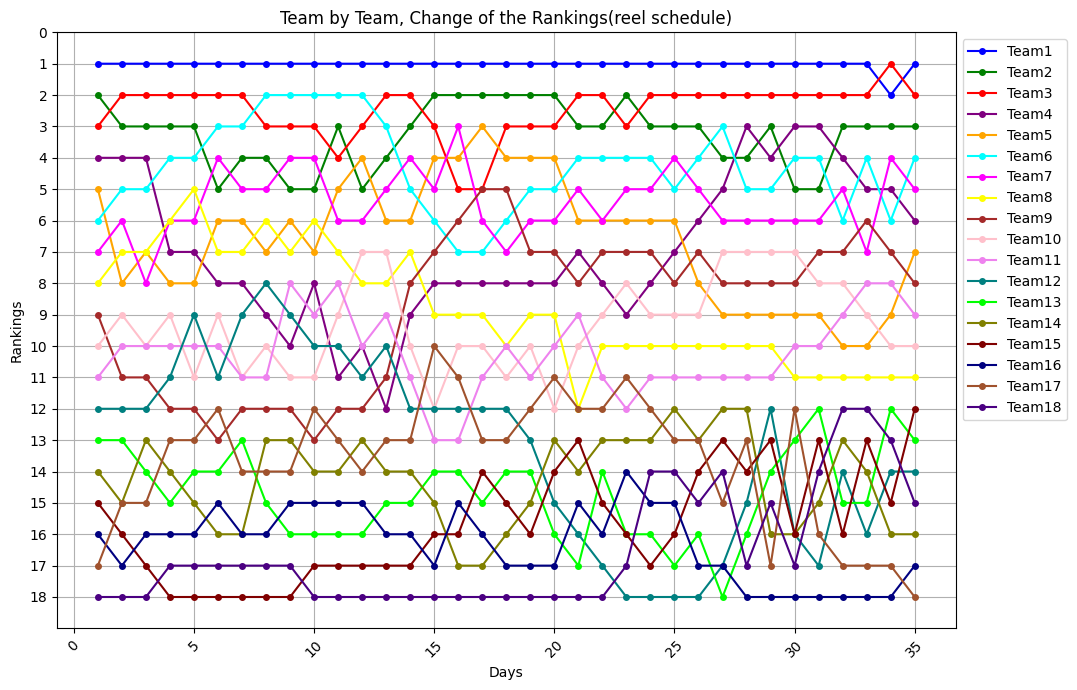

In [29]:
rank_df = df.rank(axis=1, method='max', ascending=False)
print(rank_df)
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))
all_days = range(1,36)
team1 = []
team2 = []
team3 = []
columns = rank_df.columns[:]
for i, column in enumerate(columns):

    plt.plot(all_days, rank_df[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Rankings')
plt.title('Team by Team, Change of the Rankings(reel schedule)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.yticks(np.arange(0,19, 1))
plt.ylim(19,0)

plt.show()

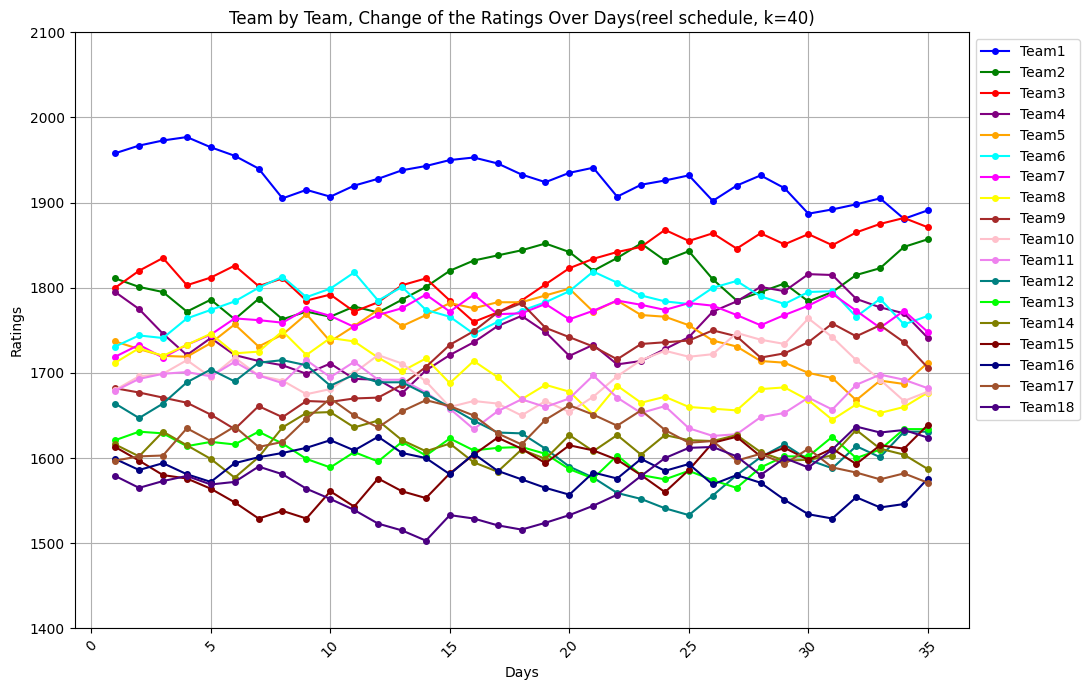

In [30]:
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))
all_days = range(1,36)
team1 = []
team2 = []
team3 = []
columns = df.columns[:]
for i, column in enumerate(columns):

    plt.plot(all_days, df[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Ratings')
plt.title('Team by Team, Change of the Ratings Over Days(reel schedule, k=40)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.ylim(1400,2100)

plt.show()

In [31]:
data2 = [{1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579},
 {1: 1958.0, 2: 1811.0, 3: 1819.712196731638, 4: 1775.287803268362, 5: 1756.6546465671568, 6: 1711.3453534328432, 7: 1718.5971021229025, 8: 1712.4028978770975, 9: 1701.8848720170076, 10: 1660.1151279829924, 11: 1678.1370666779542, 12: 1664.8629333220458, 13: 1640.712196731638, 14: 1596.287803268362, 15: 1613.0, 16: 1599.0, 17: 1615.9647627643533, 18: 1560.0352372356467},
 {1: 1951.31189043053, 2: 1827.9630300959016, 3: 1843.8568784997294, 4: 1740.868200973839, 5: 1774.0611199941106, 6: 1715.0212193322218, 7: 1718.240572837416, 8: 1691.6770878362515, 9: 1697.0791954317356, 10: 1623.836923616449, 11: 1699.7860523088298, 12: 1684.2978286429857, 13: 1656.7094532733017, 14: 1560.7918267214066, 15: 1631.039404348334, 16: 1615.8167597909464, 17: 1634.2320413768398, 18: 1526.4105144891714},
 {1: 1957.6790701197313, 2: 1863.4998298102157, 3: 1842.1268108732763, 4: 1692.5562218227178, 5: 1779.0868889142819, 6: 1738.1819410454932, 7: 1736.460456516728, 8: 1674.572216002775, 9: 1691.046666056554, 10: 1594.5238858604962, 11: 1699.6093637881033, 12: 1700.8167036505843, 13: 1669.9959341389642, 14: 1549.0870954869251, 15: 1626.438960805753, 16: 1627.874696594459, 17: 1669.355646344629, 18: 1480.087612168313},
 {1: 1972.5304673303328, 2: 1865.5908692996718, 3: 1857.4489242952343, 4: 1676.5856167144564, 5: 1768.291358619479, 6: 1784.5073348971487, 7: 1740.3404933386983, 8: 1683.165527060718, 9: 1705.5976299050988, 10: 1588.8371606387047, 11: 1678.3618427762692, 12: 1692.326504105023, 13: 1661.8656922707273, 14: 1519.249438381443, 15: 1593.9431198592872, 16: 1618.7818997140319, 17: 1713.9074098240005, 18: 1471.668710969675},
 {1: 1977.0159908427966, 2: 1843.5662954206855, 3: 1882.6252638717672, 4: 1644.8353021286252, 5: 1788.8486152309872, 6: 1829.2874634659636, 7: 1730.8467482562828, 8: 1710.8727781811665, 9: 1717.6818846258848, 10: 1555.8532487501375, 11: 1644.97391099393, 12: 1703.3116036192102, 13: 1671.4901966746038, 14: 1479.4683152913058, 15: 1551.596995140163, 16: 1625.823723304079, 17: 1745.256712102165, 18: 1489.6449521002462},
 {1: 1993.1132344058578, 2: 1843.169098457508, 3: 1878.5750157217408, 4: 1619.674501970712, 5: 1783.3356254808164, 6: 1885.5258014818146, 7: 1710.0652764019023, 8: 1751.1792766529315, 9: 1751.7419130360674, 10: 1549.9254813865475, 11: 1633.351808069006, 12: 1689.4108253976135, 13: 1669.2731710958901, 14: 1436.6437603449178, 15: 1498.724657711489, 16: 1629.8345924961875, 17: 1760.3506405279832, 18: 1509.1053193610146},
 {1: 1996.3427467598756, 2: 1859.5192123521865, 3: 1851.7065087608423, 4: 1569.2686288341774, 5: 1783.6090109123, 6: 1895.6910910063273, 7: 1726.7588418820878, 8: 1792.8161862482898, 9: 1802.7370283798534, 10: 1542.6832754381383, 11: 1606.9833421617725, 12: 1689.1236885384387, 13: 1667.2008502746132, 14: 1433.4287514214147, 15: 1448.4010105833959, 16: 1650.992842796334, 17: 1756.6123795870715, 18: 1519.1246040628814},
 {1: 2011.1678584692445, 2: 1855.1299480890234, 3: 1815.2157763783598, 4: 1552.8839387925145, 5: 1804.3019498439576, 6: 1903.8226141300775, 7: 1744.8620636002436, 8: 1844.3299068563476, 9: 1825.8284053216566, 10: 1552.329220257886, 11: 1581.1802234557233, 12: 1687.981654801248, 13: 1685.6737866069782, 14: 1421.679493663954, 15: 1420.2543104660103, 16: 1643.2583956839474, 17: 1738.2768735340883, 18: 1504.8235800487398},
 {1: 2009.641053699725, 2: 1833.1978262288033, 3: 1772.7792459081968, 4: 1538.8384427381006, 5: 1821.9251494959192, 6: 1927.3734529138703, 7: 1768.0748609624213, 8: 1897.5499882941874, 9: 1825.8701723220777, 10: 1547.2520196120242, 11: 1579.3831183175323, 12: 1685.0762110091991, 13: 1713.189960010675, 14: 1407.7373737084713, 15: 1398.3299240087342, 16: 1638.8283344672006, 17: 1751.3962881140399, 18: 1476.556578188822},
 {1: 2014.080611760869, 2: 1841.9155505791828, 3: 1764.2278715079815, 4: 1546.9965766247533, 5: 1858.2312366426913, 6: 1905.4071637323684, 7: 1802.0078828580474, 8: 1905.7825235159328, 9: 1807.8564147820457, 10: 1520.1251562021732, 11: 1585.1664564046105, 12: 1689.864686657123, 13: 1725.6317586230166, 14: 1389.9224400399983, 15: 1419.4557611133039, 16: 1621.8903670289988, 17: 1739.5982231079738, 18: 1454.8393188189302},
 {1: 2020.6211824094573, 2: 1841.5409009794053, 3: 1760.4921311289613, 4: 1547.3228817749352, 5: 1843.4598462456786, 6: 1894.0118901220812, 7: 1823.6131353508947, 8: 1918.6361654814468, 9: 1797.856619723113, 10: 1526.7103902510412, 11: 1562.557160669601, 12: 1699.1973561668244, 13: 1739.5081776337688, 14: 1377.828461253691, 15: 1469.3113268252537, 16: 1603.9739432069634, 17: 1734.4541038489936, 18: 1431.9043269278898},
 {1: 2028.014995768757, 2: 1841.540462308009, 3: 1777.0533340254945, 4: 1557.964008847443, 5: 1820.2806287792534, 6: 1871.5028386652327, 7: 1842.9713587328938, 8: 1925.4366320829977, 9: 1779.0186521988285, 10: 1545.9778993353298, 11: 1563.1177482596559, 12: 1686.0404243711662, 13: 1728.7763658729868, 14: 1370.1100976754947, 15: 1497.6678136139067, 16: 1589.4230882938082, 17: 1750.1434997443112, 18: 1417.9601514244318},
 {1: 1993.042427047537, 2: 1828.1089560874866, 3: 1785.0424942832396, 4: 1592.5931731757958, 5: 1818.9699059663903, 6: 1865.0404012977333, 7: 1860.1683502147898, 8: 1898.6425959258283, 9: 1776.0538953966056, 10: 1557.0800623085022, 11: 1575.767369205915, 12: 1665.6459139130502, 13: 1694.5280813431484, 14: 1404.5153275886169, 15: 1508.7932271093703, 16: 1574.639452451247, 17: 1787.2345989088917, 18: 1407.1337677758524},
 {1: 1973.0873664155192, 2: 1831.988919992071, 3: 1756.9752874870123, 4: 1621.7797811268395, 5: 1829.3993959744726, 6: 1862.2414095469267, 7: 1856.8610436721822, 8: 1846.577841539543, 9: 1759.2773619274756, 10: 1561.838294515889, 11: 1613.0188190818544, 12: 1645.1352815288585, 13: 1663.2412367227498, 14: 1443.3729689900797, 15: 1552.8986375406027, 16: 1581.0025823212452, 17: 1794.0326197434551, 18: 1400.2711518732244},
 {1: 1961.7187671264278, 2: 1838.7664603941546, 3: 1754.8949574122505, 4: 1637.0604427449857, 5: 1819.4838528409475, 6: 1842.123783454983, 7: 1862.8672411890802, 8: 1817.466488560176, 9: 1735.5692632725766, 10: 1581.3239676478645, 11: 1632.0840729695433, 12: 1622.7757204852026, 13: 1638.197255443643, 14: 1486.5405864956788, 15: 1575.9770841477325, 16: 1576.1416558723442, 17: 1794.41999695764, 18: 1415.58840298477},
 {1: 1952.8192977909546, 2: 1824.6567613578507, 3: 1762.0615037155535, 4: 1675.525195775902, 5: 1800.4270602033394, 6: 1800.6638015448352, 7: 1853.2705257407665, 8: 1784.2228583310784, 9: 1738.7631147576349, 10: 1624.2365913405667, 11: 1641.403794741796, 12: 1625.5638517710022, 13: 1612.2999273765117, 14: 1527.9889941854544, 15: 1577.9474321814696, 16: 1585.8839991721504, 17: 1761.9061554055033, 18: 1443.3591346076312},
 {1: 1950.4500619598955, 2: 1824.043409364047, 3: 1767.7877866803296, 4: 1680.5512499835854, 5: 1803.678555510509, 6: 1790.398138242129, 7: 1856.2127649761237, 8: 1737.7850020950343, 9: 1739.116983096665, 10: 1674.051263737047, 11: 1637.9775962211265, 12: 1623.1970282196514, 13: 1589.9051200927902, 14: 1583.435211350744, 15: 1571.0058125356309, 16: 1591.0757555690568, 17: 1715.823370398618, 18: 1456.5048899670169},
 {1: 1965.1545569088585, 2: 1842.8724548467187, 3: 1789.0875088317582, 4: 1702.57472950487, 5: 1784.8495100278374, 6: 1769.0984160907005, 7: 1841.5082700271607, 8: 1757.8616767093522, 9: 1719.0403084823472, 10: 1671.9821264985114, 11: 1640.0467334596622, 12: 1641.35322940258, 13: 1589.5327252519671, 14: 1583.8076061915672, 15: 1544.6433026582574, 16: 1572.9195543861283, 17: 1693.7998908773334, 18: 1482.8673998443903},
 {1: 1945.8428342255902, 2: 1892.0431736121095, 3: 1829.1111861824595, 4: 1720.873575615743, 5: 1747.1287391580586, 6: 1771.277943777955, 7: 1807.1668397768613, 8: 1769.9630479076577, 9: 1702.4619329054149, 10: 1689.4190600306092, 11: 1618.8706294707433, 12: 1638.1939136495691, 13: 1612.2124838657207, 14: 1579.734700394239, 15: 1542.6871879973455, 16: 1535.245762511809, 17: 1679.9780491450872, 18: 1510.7889397730278},
 {1: 1948.4774173945782, 2: 1941.7382792375743, 3: 1846.8441688752168, 4: 1754.4302860088685, 5: 1697.2588282162187, 6: 1793.787795794485, 7: 1765.9157858536257, 8: 1758.950071486687, 9: 1710.1027108121755, 10: 1682.701149203166, 11: 1627.0806747381762, 12: 1633.9743880411268, 13: 1631.422793734944, 14: 1556.4930618122598, 15: 1560.8845062959392, 16: 1485.125728952225, 17: 1644.2362979977381, 18: 1553.5760555449958},
 {1: 1966.5746722113995, 2: 1952.5149172018712, 3: 1887.734454709206, 4: 1793.5247059030426, 5: 1680.4199383256666, 6: 1798.3688140721304, 7: 1733.7170038349725, 8: 1735.026896248651, 9: 1716.6246094517542, 10: 1656.5252400321672, 11: 1628.3297831731159, 12: 1649.2282866066191, 13: 1661.0622801338814, 14: 1515.7198119008087, 15: 1555.8322272481166, 16: 1473.9553140697049, 17: 1598.2622227109791, 18: 1589.578822165914},
 {1: 1953.6883986753617, 2: 1934.3727423562027, 3: 1930.2918936436492, 4: 1847.7782612871206, 5: 1668.5872353000468, 6: 1831.3704701017073, 7: 1711.9702183401223, 8: 1718.5415659263444, 9: 1708.6310471169877, 10: 1615.0762582555521, 11: 1602.5310525519167, 12: 1630.3268394655208, 13: 1681.7773698675744, 14: 1514.871793032495, 15: 1576.4409826781098, 16: 1450.9506217471733, 17: 1579.0817012032978, 18: 1636.7115484508183},
 {1: 1933.8138299702935, 2: 1931.0438158333416, 3: 1977.7270099864995, 4: 1869.83705531901, 5: 1674.5679450822402, 6: 1867.3907850402645, 7: 1683.6344021236907, 8: 1701.1121672045372, 9: 1721.1834921512163, 10: 1603.994891510091, 11: 1596.884835244802, 12: 1637.9301287444323, 13: 1674.252545298384, 14: 1538.9923931449846, 15: 1570.6036748737156, 16: 1424.277138497472, 17: 1539.4486152859295, 18: 1646.3052746890967},
 {1: 1910.1927582192525, 2: 1906.9869659654255, 3: 2019.0168133034301, 4: 1908.380679073958, 5: 1698.4252319393818, 6: 1884.6863303959967, 7: 1646.7155455130185, 8: 1684.430188644209, 9: 1736.8832961202738, 10: 1587.115762709721, 11: 1606.2002978938879, 12: 1654.3057625172517, 13: 1649.6855461008895, 14: 1535.4876355958322, 15: 1542.0759107075446, 16: 1414.4629856209588, 17: 1534.4236198398544, 18: 1673.5246698391154},
 {1: 1865.2222416767283, 2: 1904.3302166086996, 3: 2053.9182404722565, 4: 1932.8130880510462, 5: 1705.817017988562, 6: 1898.289003345362, 7: 1643.789064027758, 8: 1706.235147796415, 9: 1732.9291288573788, 10: 1595.317270114128, 11: 1590.3133674903706, 12: 1634.9700817161443, 13: 1605.4295711213272, 14: 1514.6857625914117, 15: 1550.4343469443456, 16: 1437.9927744030185, 17: 1518.9856829684998, 18: 1701.5279938265487},
 {1: 1853.1922679666827, 2: 1905.5292571483863, 3: 2061.6615339866075, 4: 1958.4491855699423, 5: 1710.2939931789979, 6: 1871.9130698237536, 7: 1658.3112614164545, 8: 1720.6378924602616, 9: 1717.1692075679912, 10: 1595.4288581440721, 11: 1601.7169220561318, 12: 1596.9152301410277, 13: 1562.0128516242976, 14: 1536.78280792819, 15: 1571.6807775080297, 16: 1448.5969244637192, 17: 1514.1611112501553, 18: 1708.5468477652996},
 {1: 1852.905344514196, 2: 1925.10127970269, 3: 2052.479148240501, 4: 1937.4664837264208, 5: 1712.426532492277, 6: 1859.7318101075084, 7: 1679.7576771733072, 8: 1723.146619244957, 9: 1707.4551662870738, 10: 1611.4095207456187, 11: 1614.379473398359, 12: 1558.8403300843802, 13: 1516.0380214386166, 14: 1585.9099834207198, 15: 1575.9046257985806, 16: 1451.847738635843, 17: 1534.5456844784278, 18: 1693.6545605105234},
 {1: 1858.156352153124, 2: 1939.9549168411913, 3: 2048.088866847346, 4: 1912.6911167281278, 5: 1706.050010014734, 6: 1841.2882693621737, 7: 1701.0046407086793, 8: 1691.9677639119222, 9: 1701.2361534786523, 10: 1588.0923662033626, 11: 1634.2115680144955, 12: 1536.9263134755313, 13: 1525.5112764651865, 14: 1608.3384642039466, 15: 1585.7225050503014, 16: 1487.2363263657883, 17: 1539.9443030681043, 18: 1686.5787871073333},
 {1: 1864.180050394386, 2: 1950.0615542404885, 3: 2047.1683645481849, 4: 1880.7974627465621, 5: 1696.9873624901195, 6: 1822.2483589893143, 7: 1721.0072468330898, 8: 1649.0547475751785, 9: 1710.8510433114006, 10: 1603.6548455635318, 11: 1641.230800964716, 12: 1525.6232853628496, 13: 1546.1118648938973, 14: 1626.6010710748212, 15: 1578.8925434530452, 16: 1503.38250188282, 17: 1533.3600954581061, 18: 1691.7868002174891},
 {1: 1874.0396772291788, 2: 1940.3207985403074, 3: 2030.2430681105764, 4: 1828.9451229407662, 5: 1663.711451667761, 6: 1799.2993836146434, 7: 1717.9360785310346, 8: 1601.8457958241445, 9: 1685.9102094688137, 10: 1644.1451967864123, 11: 1659.007030800468, 12: 1552.6148337962197, 13: 1581.2849375410597, 14: 1628.5380112771904, 15: 1589.8048678207958, 16: 1523.241550415084, 17: 1561.4893880065572, 18: 1710.6225976289875},
 {1: 1886.3669561218373, 2: 1899.3720263103608, 3: 2024.2584015300051, 4: 1771.1985385065373, 5: 1662.3877598502042, 6: 1793.97536790471, 7: 1727.2649576331673, 8: 1596.7984533465572, 9: 1656.9895421610847, 10: 1697.20289934712, 11: 1697.7961138132425, 12: 1552.5322867817224, 13: 1589.4287476705838, 14: 1625.6977573198528, 15: 1585.864236075862, 16: 1553.637266952555, 17: 1563.0030633435022, 18: 1709.225625331096},
 {1: 1890.3985128869315, 2: 1884.9978219417583, 3: 2021.6868164326531, 4: 1753.4044480593318, 5: 1675.6978403238338, 6: 1805.6494830467325, 7: 1748.740060011873, 8: 1614.1143816247886, 9: 1644.8498460044943, 10: 1703.9425965939624, 11: 1712.5271920775494, 12: 1546.2868717398571, 13: 1589.179476379517, 14: 1627.2366150566445, 15: 1568.2549723490915, 16: 1553.2932829384447, 17: 1564.1509981072847, 18: 1688.5887844252522},
 {1: 1897.9085157985703, 2: 1884.0285775853065, 3: 2022.7261018245833, 4: 1726.3310915928782, 5: 1699.305802531776, 6: 1784.7445857392588, 7: 1754.0148517776406, 8: 1624.5241009701174, 9: 1665.1172080348765, 10: 1708.9967807472765, 11: 1693.9778831863866, 12: 1570.3683123299868, 13: 1583.2804971748456, 14: 1624.1107158019374, 15: 1582.2246520278138, 16: 1550.239250204803, 17: 1559.279684906373, 18: 1661.8213877655699},
 {1: 1870.3448452026032, 2: 1848.8920508885892, 3: 2005.9955368671901, 4: 1727.5103762365998, 5: 1686.483253639211, 6: 1793.3177107678775, 7: 1769.3533546526594, 8: 1630.0756900266279, 9: 1686.8753488827988, 10: 1740.3720647681062, 11: 1707.7712323877913, 12: 1564.194764163012, 13: 1598.946060393145, 14: 1610.603315611215, 15: 1620.9733106098392, 16: 1539.4740779679594, 17: 1540.6374582011954, 18: 1651.1795487335803}]

df2 = pd.DataFrame(data2)

nump2 = np.array(df2)
nump2 = np.round(nump2,0)
df2=pd.DataFrame(nump2)
df2.to_excel('dinamik_table.xlsx', index = False)

     0    1    2     3     4    5     6     7     8     9     10    11    12  \
0   1.0  2.0  3.0   4.0   5.0  6.0   7.0   8.0   9.0  10.0  11.0  12.0  13.0   
1   1.0  3.0  2.0   4.0   5.0  8.0   6.0   7.0   9.0  12.0  10.0  11.0  13.0   
2   1.0  3.0  2.0   5.0   4.0  7.0   6.0  10.0   9.0  15.0   8.0  11.0  12.0   
3   1.0  2.0  3.0   9.0   4.0  5.0   6.0  11.0  10.0  16.0   8.0   7.0  12.0   
4   1.0  2.0  3.0  12.0   5.0  4.0   6.0  10.0   8.0  16.0  11.0   9.0  13.0   
5   1.0  3.0  2.0  13.0   5.0  4.0   7.0   9.0   8.0  15.0  13.0  10.0  11.0   
6   1.0  4.0  3.0  14.0   5.0  2.0   9.0   8.0   7.0  15.0  12.0  10.0  11.0   
7   1.0  3.0  4.0  14.0   7.0  2.0   9.0   6.0   5.0  15.0  13.0  10.0  11.0   
8   1.0  3.0  6.0  14.0   7.0  2.0   8.0   4.0   5.0  15.0  13.0  10.0  11.0   
9   1.0  4.0  7.0  15.0   6.0  2.0   8.0   3.0   5.0  14.0  13.0  11.0  10.0   
10  1.0  5.0  8.0  14.0   4.0  3.0   7.0   2.0   6.0  15.0  13.0  11.0  10.0   
11  1.0  5.0  8.0  14.0   4.0  3.0   6.0

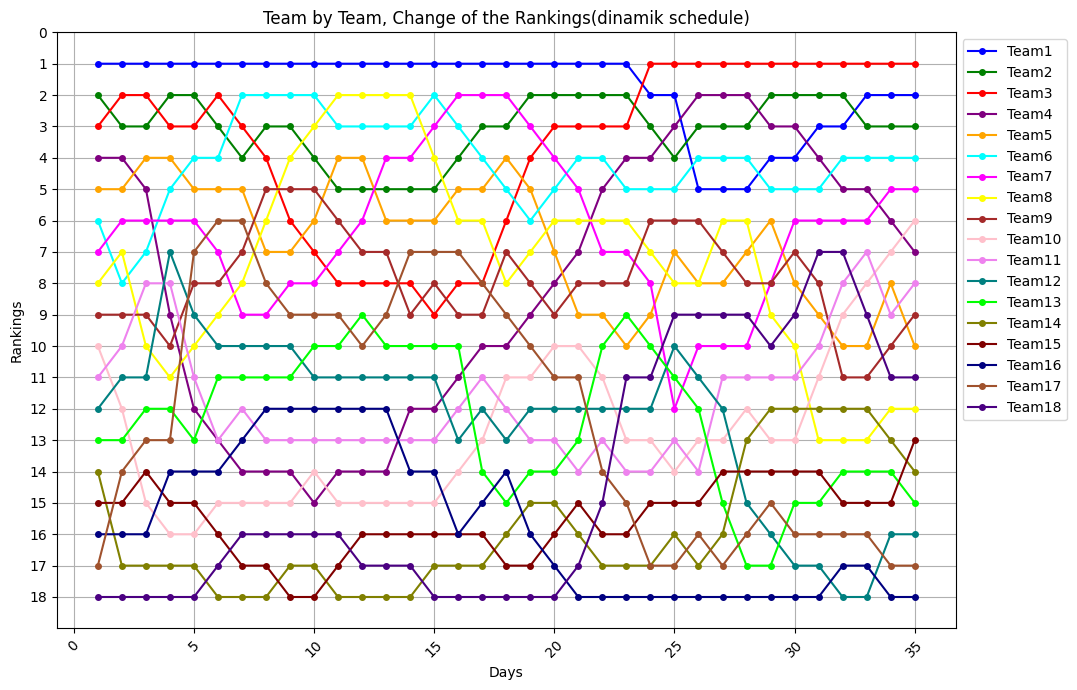

In [32]:
rank_df2 = df2.rank(axis=1, method='max', ascending=False)
print(rank_df2)
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))
all_days = range(1,36)
team1 = []
team2 = []
team3 = []
columns2 = rank_df2.columns[:]
for i, column in enumerate(columns2):

    plt.plot(all_days, rank_df2[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Rankings')
plt.title('Team by Team, Change of the Rankings(dinamik schedule)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.yticks(np.arange(0,19, 1))
plt.ylim(19,0)

plt.show()

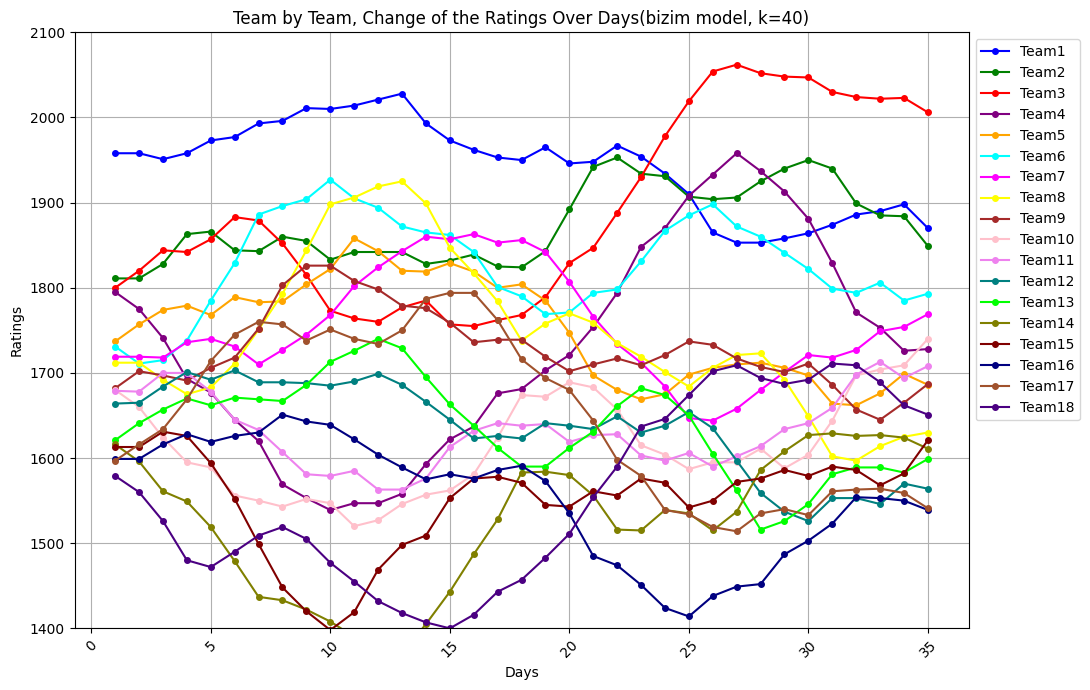

In [33]:
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))

team1 = []
team2 = []
team3 = []
columns2 = df2.columns[:]
for i, column in enumerate(columns2):

    plt.plot(all_days, df2[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Ratings')
plt.title('Team by Team, Change of the Ratings Over Days(bizim model, k=40)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.ylim(1400,2100)
plt.show()

In [34]:
data_minmax =[{1:1958.0,2:1811.0,3:1800.0,4:1795.0,5:1737.0,6:1731.0,7:1719.0,8:1712.0,9:1682.0,10:1680.0,11:1679.0,12:1664.0,13:1621.0,14:1616.0,15:1613.0,16:1599.0,17:1597.0, 18:1579.0},
 {1: 1958.0, 2: 1811.0, 3: 1816.412659874402, 4: 1811.3569761474023, 5: 1720.587340125598, 6: 1714.6430238525977, 7: 1715.8601299062102, 8: 1685.61168023421, 9: 1698.0794493692263, 10: 1654.3443955217754, 11: 1675.6919246014309, 12: 1667.1398700937898, 13: 1624.3080753985691, 14: 1595.0221815551736, 15: 1596.9205506307737, 16: 1619.9778184448264, 17: 1623.38831976579, 18: 1604.6556044782246},
 {1: 1951.0000210955016, 2: 1803.4369877438126, 3: 1838.0322317889872, 4: 1819.6177631398557, 5: 1722.6017301645286, 6: 1715.9528590792866, 7: 1708.8481284214417, 8: 1637.570396778587, 9: 1718.7268175131603, 10: 1648.3609047773546, 11: 1680.318423510294, 12: 1669.9261942178925, 13: 1627.2445887458935, 14: 1559.598795000176, 15: 1607.0817987770652, 16: 1642.7693993200337, 17: 1630.2983909297416, 18: 1611.6145689963876},
 {1: 1958.9244324054318, 2: 1813.1538097660173, 3: 1868.8955350791875, 4: 1814.6553525626887, 5: 1725.687684510204, 6: 1692.1098931168326, 7: 1692.1361908474057, 8: 1619.4831229269364, 9: 1721.5089418994075, 10: 1641.6212792104936, 11: 1684.245440601731, 12: 1684.3498725518136, 13: 1630.2762195870412, 14: 1516.7367870493783, 15: 1640.4399734775882, 16: 1637.1452294565165, 17: 1634.0415499997725, 18: 1617.5886849515534},
 {1: 1975.4102845805176, 2: 1791.2006112909612, 3: 1902.3651176120065, 4: 1820.626860411347, 5: 1721.924398112099, 6: 1673.5707090811927, 7: 1698.811263412393, 8: 1636.8426915712043, 9: 1703.5426560336728, 10: 1617.2253065312013, 11: 1710.5527438287763, 12: 1711.1552647379744, 13: 1622.7324410175677, 14: 1507.7689529431389, 15: 1647.3748767307172, 16: 1621.706273360703, 17: 1636.6401528768422, 18: 1593.5493958676848},
 {1: 1998.7635281879752, 2: 1773.3066344220942, 3: 1937.6509820877498, 4: 1814.7527040185716, 5: 1714.7398212662995, 6: 1674.9462891587602, 7: 1727.5877901386264, 8: 1649.6501176032261, 9: 1704.7470374118184, 10: 1581.4988070433706, 11: 1709.0157661088044, 12: 1725.4038626323613, 13: 1599.775855619316, 14: 1498.3759956691645, 15: 1645.6615975557918, 16: 1616.988981472186, 17: 1649.5137497456276, 18: 1570.6204798582564},
 {1: 2027.09238979975, 2: 1773.0008826143637, 3: 1976.8347714664549, 4: 1800.714888603405, 5: 1687.7323609299974, 6: 1663.643952037327, 7: 1743.8260850065788, 8: 1675.021279812388, 9: 1694.3448074080632, 10: 1580.281757648074, 11: 1678.917450046961, 12: 1729.1370284049988, 13: 1564.3954371090674, 14: 1497.8748039107882, 15: 1671.0813487233509, 16: 1625.701792493297, 17: 1646.1018078129662, 18: 1557.2971561721688},
 {1: 2055.9302003337043, 2: 1784.2017535747916, 3: 1974.6606853605326, 4: 1797.224857041337, 5: 1680.6601766219778, 6: 1648.9343846300476, 7: 1766.577910447182, 8: 1716.1358154964914, 9: 1680.830287244885, 10: 1581.5338004585983, 11: 1657.0012956061132, 12: 1712.5600076260207, 13: 1525.7726315041227, 14: 1485.997519863549, 15: 1688.1744955064244, 16: 1620.7561747415914, 17: 1678.409136186384, 18: 1537.6388677562463},
 {1: 2064.154276387316, 2: 1809.0811504243477, 3: 1940.5096499314202, 4: 1759.4652554436, 5: 1687.9471064437853, 6: 1635.7817573207815, 7: 1788.497710049675, 8: 1760.4913872474153, 9: 1672.8681170917298, 10: 1580.7254326895566, 11: 1676.235732686443, 12: 1703.0482080293793, 13: 1485.1074223796184, 14: 1509.3826116404593, 15: 1685.428766144255, 16: 1617.3491979816697, 17: 1703.553464505514, 18: 1513.372753603033},
 {1: 2074.290883860351, 2: 1842.9728428867663, 3: 1926.8941469528024, 4: 1721.719748067523, 5: 1692.7498632888369, 6: 1642.5425206232812, 7: 1800.9870769994807, 8: 1792.6564043013877, 9: 1660.31241228042, 10: 1605.5893544416663, 11: 1689.1750583469188, 12: 1685.7968222608936, 13: 1456.728565768316, 14: 1531.3051989237972, 15: 1660.8471153215853, 16: 1598.1826777537483, 17: 1717.929376004023, 18: 1492.3199319182015},
 {1: 2081.7737574889534, 2: 1851.9902602502973, 3: 1916.4300005126556, 4: 1695.3633995802663, 5: 1714.3330368088793, 6: 1673.110037420667, 7: 1807.7902801619032, 8: 1784.8114860858109, 9: 1653.5457008818707, 10: 1619.7576450000142, 11: 1697.7189438771363, 12: 1658.6664208864152, 13: 1448.687382162962, 14: 1558.2904309520666, 15: 1649.4732925831663, 16: 1602.9026478049218, 17: 1715.1302029102183, 18: 1463.2250746317952},
 {1: 2070.387088181588, 2: 1840.6902455555953, 3: 1908.7922685900483, 4: 1656.5566240298228, 5: 1703.2571376620326, 6: 1707.801705309771, 7: 1820.774181744554, 8: 1765.0564260770223, 9: 1673.5848943423393, 10: 1618.5471114731624, 11: 1678.6892970162753, 12: 1664.4063867714851, 13: 1459.0986108861093, 14: 1575.0101369924112, 15: 1628.8623058125866, 16: 1632.7109934093837, 17: 1728.671275251919, 18: 1460.1033108938927},
 {1: 2064.5816606604926, 2: 1822.5714881728582, 3: 1871.3196595459656, 4: 1658.4880955603076, 5: 1721.1156838073264, 6: 1714.1891796091654, 7: 1842.2139397135215, 8: 1731.8105816541427, 9: 1714.0176733989492, 10: 1631.2582229855684, 11: 1645.641231352067, 12: 1675.5549405336078, 13: 1493.9512163987838, 14: 1614.8380464380325, 15: 1589.2450421604499, 16: 1645.0910568022725, 17: 1706.0766223616774, 18: 1451.0356588448108},
 {1: 2062.759857069354, 2: 1833.1128833949413, 3: 1851.020179619418, 4: 1661.085003782807, 5: 1749.2824099165334, 6: 1699.7402269040947, 7: 1829.8941309404456, 8: 1713.0540454319369, 9: 1743.1632518942886, 10: 1636.3761521314589, 11: 1648.7566375062747, 12: 1696.2759187695895, 13: 1505.6179760430036, 14: 1619.3657730352857, 15: 1553.5178006395377, 16: 1633.8800434266957, 17: 1709.9208358971737, 18: 1446.1768735971605},
 {1: 2024.2595207441223, 2: 1811.197311585666, 3: 1844.560796676084, 4: 1682.057944753329, 5: 1763.1164907741534, 6: 1718.6515517641915, 7: 1821.112139796758, 8: 1719.1905286414617, 9: 1759.8081598173887, 10: 1620.1641317836054, 11: 1634.016599007164, 12: 1687.4274613376822, 13: 1507.012327680697, 14: 1660.9147146356413, 15: 1510.5623244858741, 16: 1628.1204857390333, 17: 1732.1524260672666, 18: 1468.6750847098824},
 {1: 2000.0411654288864, 2: 1813.4852227708082, 3: 1814.1907394266912, 4: 1680.543870217807, 5: 1762.272622451285, 6: 1754.6633911415818, 7: 1829.12815325284, 8: 1723.9678360087098, 9: 1766.628714850671, 10: 1620.1428912549716, 11: 1638.9408396348133, 12: 1680.1036928872784, 13: 1537.9831207458844, 14: 1654.9954744409404, 15: 1486.6615025337053, 16: 1630.7244281396543, 17: 1728.029735704883, 18: 1470.4965991085892},
 {1: 1966.3643633284084, 2: 1834.9893744227948, 3: 1778.9505221888771, 4: 1665.0508861125193, 5: 1777.2669048765238, 6: 1791.9385443972824, 7: 1843.6744626914713, 8: 1701.5546741191201, 9: 1749.3832717988919, 10: 1646.430669258293, 11: 1643.3615276918706, 12: 1672.9950252965352, 13: 1572.5216021053322, 14: 1643.1442927645453, 15: 1475.3489450794928, 16: 1632.204603906428, 17: 1732.7836830092508, 18: 1465.0366469523628},
 {1: 1946.9837540894703, 2: 1821.9607859197329, 3: 1738.3656650337905, 4: 1649.1932574665973, 5: 1806.8532976418696, 6: 1820.087339103095, 7: 1861.0449299057718, 8: 1717.278858610219, 9: 1757.6137772286204, 10: 1682.8540441527136, 11: 1633.9303332599022, 12: 1652.888955875909, 13: 1612.4868515097573, 14: 1610.8162489792633, 15: 1500.0034909353292, 16: 1610.8423737469957, 17: 1709.2386679905217, 18: 1460.5573685504403},
 {1: 1962.1351996196317, 2: 1838.2984529262317, 3: 1756.6928973060997, 4: 1666.994525926216, 5: 1787.6147420832176, 6: 1839.325894661747, 7: 1845.8934843756103, 8: 1733.6141392868756, 9: 1741.2761102221216, 10: 1655.3053742081513, 11: 1652.60173912356, 12: 1636.5536751992524, 13: 1640.0355214543197, 14: 1592.1448431156055, 15: 1477.7424961627735, 16: 1593.041105287377, 17: 1690.9114357182125, 18: 1482.818363322996},
 {1: 1989.0724544385675, 2: 1871.675004398663, 3: 1776.5356690368267, 4: 1707.7481681127608, 5: 1745.622092878767, 6: 1842.9812616918266, 7: 1813.5250984831425, 8: 1743.9980590599127, 9: 1740.8683368196394, 10: 1630.0646099678975, 11: 1648.7266217429515, 12: 1607.8520140837827, 13: 1682.1210807901432, 14: 1549.0702033423972, 15: 1484.5547789462944, 16: 1552.9995497174964, 17: 1678.8232944761328, 18: 1526.761702012797},
 {1: 1980.1659988380509, 2: 1931.6901595324841, 3: 1787.1296846077298, 4: 1756.051888895866, 5: 1686.692816997091, 6: 1839.436952515428, 7: 1785.393140988922, 8: 1753.4221038932058, 9: 1746.6119109589426, 10: 1592.3281664147557, 11: 1668.7753880487126, 12: 1558.5266220946135, 13: 1718.9485654325351, 14: 1534.882018900565, 15: 1511.8462152070679, 16: 1500.5073127951612, 17: 1653.4996438619542, 18: 1587.0914100169139},
 {1: 1987.4206447827803, 2: 1987.1000984521834, 3: 1783.71651404345, 4: 1802.899556836631, 5: 1650.897814878894, 6: 1852.104473323687, 7: 1782.987153664697, 8: 1748.2004916644228, 9: 1767.8258823800068, 10: 1587.1804233760593, 11: 1667.5945950031946, 12: 1497.2450658618222, 13: 1727.2684346816998, 14: 1505.5854518027954, 15: 1550.3555287491383, 16: 1454.840961208747, 17: 1616.269888150184, 18: 1623.5070211396062},
 {1: 1969.9882052157145, 2: 2002.745852875544, 3: 1773.1776226444567, 4: 1867.9824004997452, 5: 1619.7796684304822, 6: 1889.0076934628087, 7: 1793.0302766888833, 8: 1737.5494963802444, 9: 1802.5789864003236, 10: 1596.4944734377236, 11: 1669.5836064999303, 12: 1435.1260073804713, 13: 1715.7838595866665, 14: 1457.6871538933985, 15: 1575.7720573016659, 16: 1446.6265690484847, 17: 1578.7093394193425, 18: 1661.3767308341132},
 {1: 1975.6414616923976, 2: 1990.2444855380907, 3: 1779.927027342846, 4: 1945.4852544191072, 5: 1627.273169267208, 6: 1929.5116767461082, 7: 1785.0282923970399, 8: 1699.7245924361027, 9: 1817.4215395520434, 10: 1625.648882087517, 11: 1654.075323656929, 12: 1407.9085293895228, 13: 1723.1401144278134, 14: 1447.0039357275248, 15: 1576.0820251019593, 16: 1417.9579560603381, 17: 1524.9103775030883, 18: 1666.015356654363},
 {1: 1991.9352679279468, 2: 1956.0136697373553, 3: 1815.7152520199957, 4: 1997.0487187483754, 5: 1602.033658059933, 6: 1964.1230422532383, 7: 1790.0308474273738, 8: 1661.9742155062722, 9: 1839.1017478137408, 10: 1630.876628255537, 11: 1629.8813550361865, 12: 1417.4309807556033, 13: 1722.472393922277, 14: 1446.9868412138378, 15: 1548.7808585626258, 16: 1408.521464895595, 17: 1508.8904568993817, 18: 1661.1826009647234},
 {1: 1970.2357203091058, 2: 1905.484103847212, 3: 1846.2499505099945, 4: 2034.1017664048532, 5: 1575.9854503469035, 6: 1991.0314955883528, 7: 1804.122502131787, 8: 1669.3051569985746, 9: 1861.9754535555844, 10: 1668.326506859405, 11: 1621.5826319928904, 12: 1445.986708207749, 13: 1709.9987112927429, 14: 1457.7774934935337, 15: 1523.1701366597276, 16: 1390.622373382202, 17: 1472.3782200940432, 18: 1644.6656183253374},
 {1: 1924.6970990208338, 2: 1864.7650020249635, 3: 1894.2109376993744, 4: 2029.9601406518927, 5: 1552.255520789847, 6: 2014.7638917517124, 7: 1819.8950020472485, 8: 1685.8066825978003, 9: 1867.5789051812926, 10: 1724.8530742754447, 11: 1629.3730756946368, 12: 1492.501792244237, 13: 1699.969382500497, 14: 1468.3998405589198, 15: 1493.0836389420344, 16: 1361.9070492383323, 17: 1463.9987725538924, 18: 1604.9801922270397},
 {1: 1894.2880829049896, 2: 1806.5485090234918, 3: 1949.0980689348758, 4: 1992.4135954501137, 5: 1551.05447677494, 6: 2002.0219322790429, 7: 1831.7282540680897, 8: 1663.3633096620888, 9: 1856.1187824467233, 10: 1791.9843628252352, 11: 1639.4662669724232, 12: 1537.9637853879283, 13: 1681.2808815512624, 14: 1469.1922948061388, 15: 1508.7406657641704, 16: 1378.2844652055992, 17: 1444.017089308963, 18: 1595.4351766339234},
 {1: 1860.7910152142128, 2: 1782.4351784844193, 3: 1992.9977636909819, 4: 1957.7853605490823, 5: 1567.7319581416089, 6: 2000.6770937608471, 7: 1840.0627988610313, 8: 1635.007746764581, 9: 1832.652356892116, 10: 1817.9801668649702, 11: 1616.1288606722167, 12: 1555.4169573232539, 13: 1645.4059942015222, 14: 1489.3348786287067, 15: 1544.6828398192988, 16: 1425.194756350013, 17: 1422.448287817004, 18: 1606.2659859641328},
 {1: 1826.4896813796167, 2: 1773.1952501374494, 3: 2025.9736309269997, 4: 1920.8738265061502, 5: 1583.5585181720855, 6: 1980.5503433288504, 7: 1826.7483311321657, 8: 1618.3156974815731, 9: 1802.6725669575753, 10: 1837.407237902821, 11: 1601.646999861498, 12: 1578.8975384716994, 13: 1644.0684835032819, 14: 1516.176639252471, 15: 1558.0765834404012, 16: 1450.3459745182884, 17: 1414.5237375110605, 18: 1633.4789595160114},
 {1: 1813.5467513264227, 2: 1770.056155069499, 3: 2044.9143900498302, 4: 1867.2066521866323, 5: 1636.9216274127282, 6: 1933.7784455474064, 7: 1773.7089739015544, 8: 1608.8478960168777, 9: 1755.319290851959, 10: 1835.1689754879833, 11: 1605.9577630273673, 12: 1624.488443984021, 13: 1625.0427261311322, 14: 1524.8938545948554, 15: 1597.4290265921136, 16: 1496.7487351850473, 17: 1408.1766325059425, 18: 1670.7936601286265},
 {1: 1817.2549594278296, 2: 1773.23758782512, 3: 2053.7962247202454, 4: 1804.1847250333628, 5: 1694.4388377810708, 6: 1890.462484069846, 7: 1734.560412308106, 8: 1635.0510946017844, 9: 1703.4622461916756, 10: 1803.929074171574, 11: 1639.6705510229992, 12: 1643.6949905596214, 13: 1587.3515706296157, 14: 1524.511610682512, 15: 1632.4537907541219, 16: 1535.8932156597584, 17: 1440.7938964316704, 18: 1678.2527281290854},
 {1: 1823.3515365327628, 2: 1801.0209862612458, 3: 2037.3332402143653, 4: 1777.1027533322133, 5: 1712.5829135765166, 6: 1830.360963499881, 7: 1721.2429735878839, 8: 1645.1693467694379, 9: 1648.9390837424942, 10: 1784.7095184973316, 11: 1675.1677369354409, 12: 1632.2299105672969, 13: 1578.639881415339, 14: 1563.841453057204, 15: 1664.7481718454037, 16: 1548.869228410965, 17: 1494.2025501813014, 18: 1653.4877515729152},
 {1: 1830.6923401068716, 2: 1825.3321871643564, 3: 2029.9116599245858, 4: 1777.8865518231275, 5: 1704.7992220369306, 6: 1808.8547956191217, 7: 1732.2606135813762, 8: 1626.6455902685248, 9: 1656.3470877453287, 10: 1747.487421202206, 11: 1689.1749713327015, 12: 1615.5885193986373, 13: 1599.3283513334193, 14: 1577.2264318811222, 15: 1659.5072913206209, 16: 1548.6813277344231, 17: 1516.3217865266383, 18: 1646.9538510000066},
 {1: 1845.1422553945513, 2: 1842.4568322838759, 3: 2027.7665457157548, 4: 1747.1066316471001, 5: 1699.3807821060777, 6: 1793.7405201435377, 7: 1749.3176528489496, 8: 1621.7346431545513, 9: 1662.0336838004253, 10: 1722.433482811758, 11: 1700.9978772397637, 12: 1596.5646296259067, 13: 1597.2764933790565, 14: 1612.3011309402955, 15: 1646.8320655145874, 16: 1546.5398925998159, 17: 1537.4173373559454, 18: 1643.9575434380456}]


In [35]:
df_minmax = pd.DataFrame(data_minmax)

nump_minmax = np.array(df_minmax)
nump_minmax = np.round(nump_minmax,0)
df_minmax=pd.DataFrame(nump_minmax)
df_minmax.to_excel('dinamik_table.xlsx', index = False)

     0    1    2     3     4     5    6     7     8     9     10    11    12  \
0   1.0  2.0  3.0   4.0   5.0   6.0  7.0   8.0   9.0  10.0  11.0  12.0  13.0   
1   1.0  4.0  2.0   4.0   5.0   7.0  6.0   9.0   8.0  12.0  10.0  11.0  13.0   
2   1.0  4.0  2.0   3.0   5.0   7.0  8.0  13.0   6.0  11.0   9.0  10.0  15.0   
3   1.0  4.0  2.0   3.0   5.0   8.0  8.0  16.0   6.0  11.0  10.0  10.0  15.0   
4   1.0  4.0  2.0   3.0   5.0  10.0  9.0  13.0   8.0  16.0   7.0   7.0  14.0   
5   1.0  4.0  2.0   3.0   7.0  10.0  5.0  12.0   9.0  16.0   8.0   6.0  15.0   
6   1.0  4.0  2.0   3.0   8.0  12.0  5.0  10.0   7.0  15.0   9.0   6.0  16.0   
7   1.0  4.0  2.0   3.0  10.0  13.0  5.0   6.0  10.0  15.0  12.0   7.0  17.0   
8   1.0  3.0  2.0   6.0   9.0  13.0  4.0   5.0  12.0  15.0  11.0   8.0  18.0   
9   1.0  3.0  2.0   6.0   8.0  13.0  4.0   5.0  12.0  14.0   9.0  10.0  18.0   
10  1.0  3.0  2.0   9.0   7.0  10.0  4.0   5.0  12.0  14.0   8.0  11.0  18.0   
11  1.0  3.0  2.0  12.0   8.0   7.0  4.0

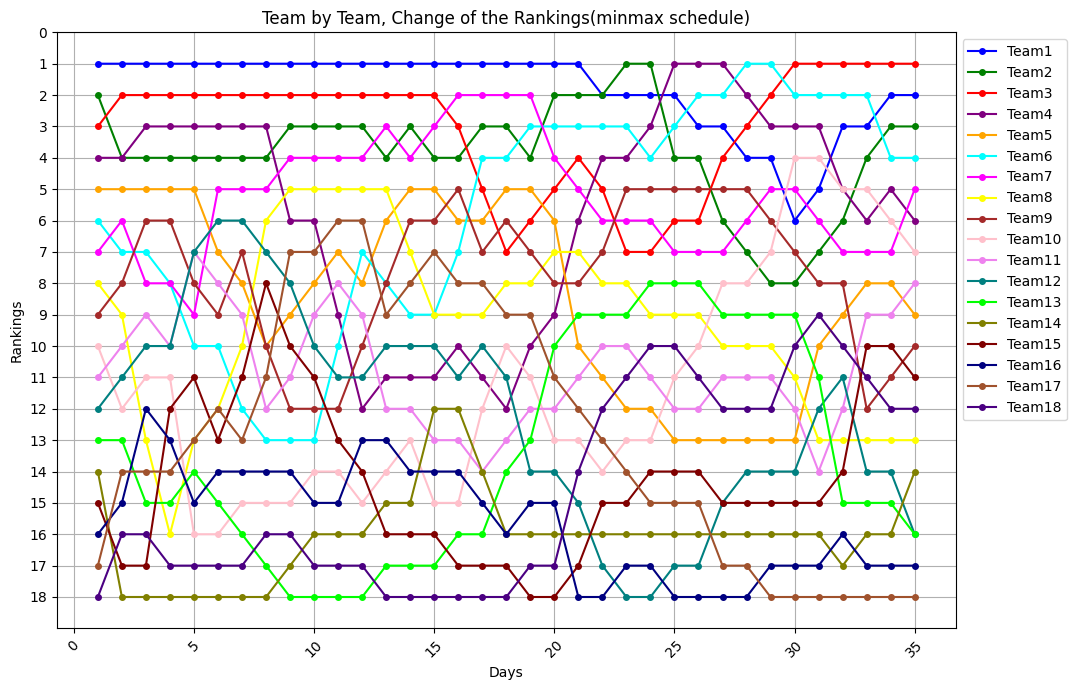

In [36]:
rank_minmax = df_minmax.rank(axis=1, method='max', ascending=False)
print(rank_minmax)
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))
all_days = range(1,36)
team1 = []
team2 = []
team3 = []
columns3 = rank_minmax.columns[:]
for i, column in enumerate(columns3):

    plt.plot(all_days, rank_minmax[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Rankings')
plt.title('Team by Team, Change of the Rankings(minmax schedule)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.yticks(np.arange(0,19, 1))
plt.ylim(19,0)

plt.show()

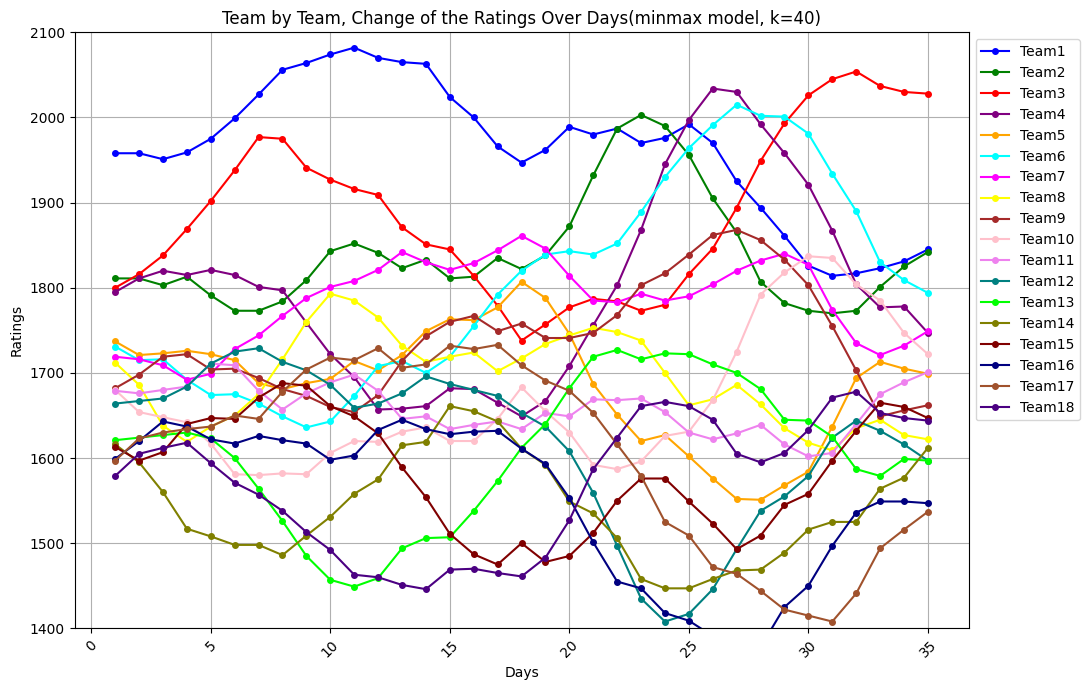

In [37]:
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))

team1 = []
team2 = []
team3 = []
columns_minmax = df_minmax.columns[:]
for i, column in enumerate(columns_minmax):

    plt.plot(all_days, df_minmax[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Ratings')
plt.title('Team by Team, Change of the Ratings Over Days(minmax model, k=40)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.ylim(1400,2100)

plt.show()

In [38]:
data = [{1:1958.0,2:1811.0,3:1800.0,4:1795.0,5:1737.0,6:1731.0,7:1719.0,8:1712.0,9:1682.0,10:1680.0,11:1679.0,12:1664.0,13:1621.0,14:1616.0,15:1613.0,16:1599.0,17:1597.0, 18:1579.0},
{1: 1962.3776919454008, 2: 1806.0183387424493, 3: 1809.856098365819, 4: 1785.143901634181, 5: 1732.6223080545992, 6: 1737.373563296672, 7: 1726.1193229235541, 8: 1720.6271721623266, 9: 1679.6011728191095, 10: 1688.0951392069685, 11: 1686.1987000039423, 12: 1655.3728278376734, 13: 1625.9816612575507, 14: 1608.8806770764459, 15: 1604.9048607930315, 16: 1592.626436703328, 17: 1599.3988271808905, 18: 1571.8012999960577},
{1: 1965.660351782898, 2: 1802.7001691034893, 3: 1817.4915672667942, 4: 1770.4653076521777, 5: 1728.7976864554719, 6: 1735.9646513246373, 7: 1718.483854022579, 8: 1716.5877132860398, 9: 1676.3185129816122, 10: 1689.5040511790032, 11: 1689.5168696429023, 12: 1663.9303740097707, 13: 1625.2180353009685, 14: 1623.5592710584492, 15: 1596.3473146209342, 16: 1596.4510583024553, 17: 1600.1624531374728, 18: 1575.8407588723444},
{1: 1967.7923787580892, 2: 1790.8026455673348, 3: 1801.9419464677476, 4: 1757.4916058502456, 5: 1727.6718863915062, 6: 1747.8621748607918, 7: 1725.8621218259, 8: 1723.2614262719335, 9: 1673.5045460736383, 10: 1697.6284768744201, 11: 1690.642669706868, 12: 1676.9040758117028, 13: 1617.8397674976475, 14: 1615.4348453630323, 15: 1594.215287645743, 16: 1589.7773453165617, 17: 1615.7120739365193, 18: 1578.6547257803184},
{1: 1961.724531020358, 2: 1797.5492156609712, 3: 1806.496039609954, 4: 1765.7854568086673, 5: 1734.556520663504, 6: 1753.3437088327269, 7: 1732.2445165101467, 8: 1729.3292740096647, 9: 1666.757975980002, 10: 1689.3346259159985, 11: 1688.5773736540814, 12: 1685.1530807950844, 13: 1619.905063550434, 14: 1607.1858403796507, 15: 1587.8328929614963, 16: 1585.2232521743551, 17: 1608.8274396645215, 18: 1573.1731918083833},
{1: 1956.3556848609758, 2: 1785.755749089384, 3: 1813.1389096338435, 4: 1754.823058841554, 5: 1746.3499872350912, 6: 1758.712554992109, 7: 1743.20691447726, 8: 1718.1831933510773, 9: 1657.3851644007668, 10: 1700.4807065745858, 11: 1697.9501852333165, 12: 1678.510210771195, 13: 1618.5680652790961, 14: 1596.5545469224253, 15: 1578.436430174951, 16: 1595.8545456315805, 17: 1618.2239024510668, 18: 1574.5101900797213},
{1: 1948.8588547501788, 2: 1796.5422719010728, 3: 1802.3523868221546, 4: 1750.5422209459696, 5: 1733.8439082369464, 6: 1766.9812882854117, 7: 1742.487916715654, 8: 1718.9021911126833, 9: 1669.8912433989117, 10: 1689.8491864257708, 11: 1689.6814519400139, 12: 1689.14173092001, 13: 1626.064895389893, 14: 1607.177433654569, 15: 1568.3234287112282, 16: 1600.135383527165, 17: 1607.601015718923, 18: 1584.6231915434441},
{1: 1931.3133505843366, 2: 1784.3440799520977, 3: 1806.7948023583367, 4: 1746.6454618827695, 5: 1740.8376002361342, 6: 1774.2573507220382, 7: 1740.96444342773, 8: 1731.1003830616585, 9: 1662.6151809622852, 10: 1687.3229148852133, 11: 1686.3239372476567, 12: 1690.665204207934, 13: 1619.0712033907053, 14: 1624.7229378204113, 15: 1571.6809434035854, 16: 1602.6616550677224, 17: 1611.497774782123, 18: 1580.180776007262},
{1: 1936.4479528824832, 2: 1788.8880875931275, 3: 1793.4599630442942, 4: 1741.510859584623, 5: 1751.7965422715145, 6: 1763.298408686658, 7: 1749.4326678669672, 8: 1717.7877734426409, 9: 1671.3684056319005, 10: 1678.854690445976, 11: 1699.6587765616991, 12: 1688.1850731663203, 13: 1610.31797872109, 14: 1633.4478892372658, 15: 1567.1369357625556, 16: 1605.1417861093362, 17: 1624.8103844011407, 18: 1571.4558245904075},
{1: 1932.5500517827998, 2: 1785.8228732902755, 3: 1797.3578641439776, 4: 1746.9730002012457, 5: 1736.9313265227397, 6: 1769.1593695529084, 7: 1745.5030107401699, 8: 1727.2664520152066, 9: 1670.2812787799412, 10: 1681.9199047488282, 11: 1690.1800979891334, 12: 1676.3809676782603, 13: 1604.4570178548395, 14: 1634.535016089225, 15: 1582.0021515113303, 16: 1609.0714432361335, 17: 1636.6144898892007, 18: 1565.9936839737848},
{1: 1937.6325610057481, 2: 1791.1333106497982, 3: 1786.5480236510382, 4: 1736.6840580502956, 5: 1747.2202686736898, 6: 1779.9692100458478, 7: 1740.4205015172215, 8: 1725.6408379161903, 9: 1671.9068928789575, 10: 1690.62325121109, 11: 1698.5920589094615, 12: 1683.3065275840493, 13: 1613.8116132330151, 14: 1626.123055168897, 15: 1572.6475561331547, 16: 1603.7610058766109, 17: 1627.911143426939, 18: 1559.0681240679958},
{1: 1941.3896310227776, 2: 1786.7115083201738, 3: 1791.9490954139362, 4: 1734.8409285257896, 5: 1756.5999601839544, 6: 1764.6220974622388, 7: 1747.2908607788988, 8: 1716.2611464059257, 9: 1673.7500224034634, 10: 1700.8525717228135, 11: 1688.362738397738, 12: 1679.5494575670198, 13: 1608.410541470117, 14: 1630.5448574985214, 15: 1587.9946687167637, 16: 1612.4816899857117, 17: 1621.0407841652616, 18: 1550.347439958895},
{1: 1945.3949192211294, 2: 1795.2295472497062, 3: 1800.9351617281352, 4: 1726.3228895962573, 5: 1747.6138938697554, 6: 1773.2390778723557, 7: 1752.1604486382168, 8: 1707.6441659958089, 9: 1681.3307161564564, 10: 1696.8472835244618, 11: 1688.1091261792137, 12: 1679.803069785544, 13: 1619.0467577990933, 14: 1619.9086411695453, 15: 1580.4139749637707, 16: 1602.7279906955973, 17: 1630.794483455376, 18: 1545.477852099577},
{1: 1947.8372256064672, 2: 1802.0243690613179, 3: 1805.322285995206, 4: 1737.6650977225788, 5: 1754.0952914629995, 6: 1761.896869746034, 7: 1760.337508582652, 8: 1715.1480005061796, 9: 1691.7770221798128, 10: 1686.4009775011054, 11: 1679.9320662347786, 12: 1673.0082479739324, 13: 1611.5429232887225, 14: 1613.4272435763012, 15: 1576.0268506967, 16: 1600.2856843102595, 17: 1638.3870691890697, 18: 1537.8852663658831},
{1: 1950.7199848199402, 2: 1810.8302495615433, 3: 1792.1657749963715, 4: 1746.0185347220627, 5: 1761.802890450306, 6: 1757.8659949054852, 7: 1751.5316280824266, 8: 1701.3448933357868, 9: 1704.9335331786472, 10: 1672.3689918060484, 11: 1671.5786292352948, 12: 1665.300648986626, 13: 1621.219027241809, 14: 1617.45811841685, 15: 1589.8299578670928, 16: 1590.609580357173, 17: 1635.5043099755967, 18: 1551.9172520609402},
{1: 1952.5495905779205, 2: 1816.172754277158, 3: 1779.60969685632, 4: 1752.573426578693, 5: 1759.2841625790602, 6: 1747.6836973707018, 7: 1761.71392561721, 8: 1713.9009714758383, 9: 1713.7977293778258, 10: 1674.8877196772942, 11: 1659.2894461593326, 12: 1656.4364527874473, 13: 1614.6641353851787, 14: 1606.664587950879, 15: 1600.623488333064, 16: 1602.8987634331352, 17: 1630.161805259982, 18: 1550.08764630296},
{1: 1948.8142487737507, 2: 1819.9080960813278, 3: 1785.0060335545431, 4: 1761.4649180362676, 5: 1763.8986272158563, 6: 1755.116152898342, 7: 1750.3434644648287, 8: 1705.0094800182637, 9: 1725.168190530207, 10: 1673.1714996868677, 11: 1668.4530438934585, 12: 1649.003997259807, 13: 1616.3803553756052, 14: 1601.2682512526558, 15: 1610.6889750785024, 16: 1592.8332766876968, 17: 1620.998207525856, 18: 1545.4731816661638},
{1: 1942.1352367904115, 2: 1823.3246448993593, 3: 1791.8939240379918, 4: 1767.3785968117002, 5: 1763.50867610599, 6: 1761.436891052174, 7: 1750.733415574695, 8: 1692.109251091217, 9: 1731.5333848671096, 10: 1666.283609203419, 11: 1675.1320558767977, 12: 1648.0677633130001, 13: 1617.316589322412, 14: 1614.1684801797026, 15: 1604.7752963030698, 16: 1586.4680823507942, 17: 1614.6774693720242, 18: 1542.0566328481323},
{1: 1937.4036794603414, 2: 1828.0045852467272, 3: 1801.1894849052333, 4: 1758.0830359444587, 5: 1768.24023343606, 6: 1766.7874489143344, 7: 1756.993416179004, 8: 1700.8483813811495, 9: 1718.2913396105535, 10: 1674.5315238136386, 11: 1671.4787669017041, 12: 1639.3286330230676, 13: 1612.6366489750442, 14: 1607.9084795753936, 15: 1596.5273816928502, 16: 1581.1175244886338, 17: 1627.9195146285804, 18: 1545.7099218232258},
{1: 1941.8186418246348, 2: 1823.7813421025728, 3: 1809.9242369767367, 4: 1744.0111438987167, 5: 1773.3210915914372, 6: 1774.1928064408428, 7: 1748.2586641075006, 8: 1696.6580028039336, 9: 1713.87637724626, 10: 1667.1261662871302, 11: 1675.7020100458585, 12: 1628.102908350443, 13: 1603.0762417202313, 14: 1621.9803716211356, 15: 1607.7531063654749, 16: 1576.0366663332566, 17: 1637.4799218833932, 18: 1549.9003004004417},
{1: 1944.3691101628324, 2: 1812.3636826830177, 3: 1815.3319403511132, 4: 1750.7935296219298, 5: 1760.5830627954467, 6: 1785.6104658603979, 7: 1754.3073308466844, 8: 1683.3193147796865, 9: 1709.478552500062, 10: 1675.8340300132445, 11: 1688.440038841849, 12: 1621.3205226272298, 13: 1597.0275749810476, 14: 1613.2725078950214, 15: 1605.2026380272773, 16: 1589.3753543575037, 17: 1632.0722185090167, 18: 1554.2981251466397},
{1: 1928.0095039000737, 2: 1819.4860377543584, 3: 1819.6128490962406, 4: 1738.6688861928662, 5: 1767.0441608518322, 6: 1779.7885578934968, 7: 1760.2611585190846, 8: 1699.6789210424452, 9: 1702.3561974287213, 10: 1687.958673442308, 11: 1675.8680530080767, 12: 1611.0889235646446, 13: 1609.5995608148198, 14: 1623.5041069576066, 15: 1599.2488103548772, 16: 1585.0944456123764, 17: 1625.6111204526312, 18: 1560.1200331135408},
{1: 1933.984625417128, 2: 1827.9879984919255, 3: 1824.2410719767752, 4: 1739.2895628696208, 5: 1758.5422001142651, 6: 1773.8134363764425, 7: 1759.64048184233, 8: 1689.3417130992361, 9: 1711.5952810234382, 10: 1698.295881385517, 11: 1666.6289694133598, 12: 1606.46070068411, 13: 1598.184975977037, 14: 1612.4030699091081, 15: 1590.0061258281428, 16: 1596.1954826608749, 17: 1634.8538049793656, 18: 1571.5346179513235},
{1: 1936.5129632330868, 2: 1817.8801574585136, 3: 1834.348913010187, 4: 1745.389072493463, 5: 1757.1991234288475, 6: 1770.822702178452, 7: 1757.6442878992548, 8: 1691.3379070423114, 9: 1712.9383577088558, 10: 1705.7125371882678, 11: 1669.6197036113504, 12: 1599.0440448813592, 13: 1595.6566381610783, 14: 1623.0483561185454, 15: 1579.4749734426064, 16: 1590.0959730370328, 17: 1624.2085187699283, 18: 1582.06577033686},
{1: 1939.3391743593847, 2: 1824.390919167244, 3: 1828.1419974631401, 4: 1752.03609074302, 5: 1752.8579695322105, 6: 1769.171902419493, 7: 1763.3721111487025, 8: 1684.827145333581, 9: 1714.5891574678146, 10: 1702.5024507852327, 11: 1657.0818242008015, 12: 1593.3162216319115, 13: 1599.9977920577153, 14: 1620.2221449922474, 15: 1592.0128528531552, 16: 1593.3060594400679, 17: 1617.5615005203713, 18: 1588.272685883907},
{1: 1924.4160981807572, 2: 1808.5487702118178, 3: 1833.5811954146034, 4: 1766.9591669216475, 5: 1743.327177480115, 6: 1778.7026944715885, 7: 1761.637849088699, 8: 1682.9149171727238, 9: 1721.4055630178684, 10: 1704.236712845236, 11: 1651.6426262493383, 12: 1603.3159291405184, 13: 1593.1813865076615, 14: 1619.305148969013, 15: 1607.8550018085814, 16: 1583.306351931461, 17: 1619.4737286812285, 18: 1589.1896819071412},
{1: 1931.8596428514647, 2: 1795.6335006589698, 3: 1826.1376507438958, 4: 1772.246777826094, 5: 1739.6142626080893, 6: 1783.818570473226, 7: 1756.912885722974, 8: 1682.017251155132, 9: 1718.5486471664753, 10: 1717.151982398084, 11: 1652.54029226693, 12: 1613.7806530087694, 13: 1588.065510506024, 14: 1622.1620648204062, 15: 1611.5679166806071, 16: 1588.0313152971862, 17: 1609.0090048129775, 18: 1583.9020710026946},
{1: 1937.2106982195317, 2: 1800.2806248059449, 3: 1834.9255978836395, 4: 1781.3102907234406, 5: 1730.5507497107428, 6: 1775.0306233334823, 7: 1751.561830354907, 8: 1693.06485146502, 9: 1707.5010468565874, 10: 1714.136148439827, 11: 1661.668157946835, 12: 1622.9227920366552, 13: 1598.7409342238147, 14: 1613.0341991405012, 15: 1600.8924929628165, 16: 1583.384191150211, 17: 1612.0248387712347, 18: 1574.7599319748088},
{1: 1930.0254273974344, 2: 1805.3587842345235, 3: 1829.011742611513, 4: 1779.2172819651014, 5: 1729.4759860088132, 6: 1770.3999424101437, 7: 1757.7484900940487, 8: 1694.1396151669496, 9: 1709.5940556149267, 10: 1712.637374443149, 11: 1663.166931943513, 12: 1630.1080628587524, 13: 1604.6547894959413, 14: 1607.9560397119226, 15: 1605.523173886155, 16: 1573.1360159874705, 17: 1605.838179032093, 18: 1585.0081071375494},
{1: 1914.474632774059, 2: 1794.6077879750367, 3: 1836.222760664262, 4: 1789.9682782245882, 5: 1722.264967956064, 6: 1778.2395768554795, 7: 1763.1494717014, 8: 1686.2999807216138, 9: 1716.6851389876754, 10: 1728.1881690665243, 11: 1672.218282415569, 12: 1621.0567123866963, 13: 1604.749804255732, 14: 1607.8610249521319, 15: 1598.4320905134064, 16: 1564.074490097658, 17: 1614.8997049219054, 18: 1579.6071255301981},
{1: 1916.8230883690262, 2: 1799.9903910132941, 3: 1830.2789294065878, 4: 1789.6308272392246, 5: 1719.0862220464885, 6: 1778.5770278408431, 7: 1770.590426327363, 8: 1673.9949540430966, 9: 1727.0161018863323, 10: 1717.8572061678674, 11: 1664.777327789606, 12: 1615.6741093484388, 13: 1617.0548309342491, 14: 1611.0397708617074, 15: 1604.3759217710806, 16: 1561.726034502691, 17: 1603.8873823356912, 18: 1590.6194481164123},
{1: 1919.6566963158173, 2: 1809.1462059835526, 3: 1837.391316807219, 4: 1776.1843495977132, 5: 1706.1946714412422, 6: 1764.096902154692, 7: 1761.4346113571046, 8: 1682.0175522036504, 9: 1719.9037144857011, 10: 1704.3503990398135, 11: 1678.2238054311174, 12: 1628.565659953685, 13: 1605.4756669862873, 14: 1625.5198965478585, 15: 1596.3533236105268, 16: 1573.3051984506528, 17: 1601.0537743889001, 18: 1604.1262552444662},
{1: 1922.4541706559587, 2: 1813.7832704129764, 3: 1843.1953564147843, 4: 1771.6315635900867, 5: 1716.1415895130754, 6: 1774.020276765622, 7: 1751.5112367461747, 8: 1676.2135125960851, 9: 1727.3337287606867, 10: 1694.4034809679804, 11: 1685.2925698306003, 12: 1621.1356456786996, 13: 1610.0284529939138, 14: 1614.6823815773355, 15: 1607.1908385810498, 16: 1566.23643405117, 17: 1596.4167099594763, 18: 1601.3287809043247},
{1: 1909.4245302085928, 2: 1826.8129108603423, 3: 1847.4269608910392, 4: 1768.9522373034163, 5: 1712.952268564897, 6: 1759.8835228328523, 7: 1760.816473242473, 8: 1678.8928388827555, 9: 1718.0284922643884, 10: 1682.0216141236235, 11: 1682.7888907320923, 12: 1635.2723996114692, 13: 1622.4103198382707, 14: 1610.4507771010806, 15: 1606.0175054505733, 16: 1567.4097671816464, 17: 1598.9203890579843, 18: 1604.5181018525032},
{1: 1913.6923016161095, 2: 1831.1651690335393, 3: 1842.996014943226, 4: 1754.578619806397, 5: 1724.321261355282, 6: 1765.5559112821752, 7: 1749.4474804520878, 8: 1686.9480100830208, 9: 1703.945941229716, 10: 1686.4525600714367, 11: 1678.5211193245757, 12: 1634.9023682222771, 13: 1622.7803512274627, 14: 1602.3956059008153, 15: 1620.3911229475925, 16: 1581.4923182163188, 17: 1593.2480006086614, 18: 1600.1658436793061}]

df = pd.DataFrame(data)
print(df)
nump = np.array(df)
nump = np.round(nump,0)
df=pd.DataFrame(nump)


             1            2            3            4            5   \
0   1958.000000  1811.000000  1800.000000  1795.000000  1737.000000   
1   1962.377692  1806.018339  1809.856098  1785.143902  1732.622308   
2   1965.660352  1802.700169  1817.491567  1770.465308  1728.797686   
3   1967.792379  1790.802646  1801.941946  1757.491606  1727.671886   
4   1961.724531  1797.549216  1806.496040  1765.785457  1734.556521   
5   1956.355685  1785.755749  1813.138910  1754.823059  1746.349987   
6   1948.858855  1796.542272  1802.352387  1750.542221  1733.843908   
7   1931.313351  1784.344080  1806.794802  1746.645462  1740.837600   
8   1936.447953  1788.888088  1793.459963  1741.510860  1751.796542   
9   1932.550052  1785.822873  1797.357864  1746.973000  1736.931327   
10  1937.632561  1791.133311  1786.548024  1736.684058  1747.220269   
11  1941.389631  1786.711508  1791.949095  1734.840929  1756.599960   
12  1945.394919  1795.229547  1800.935162  1726.322890  1747.613894   
13  19

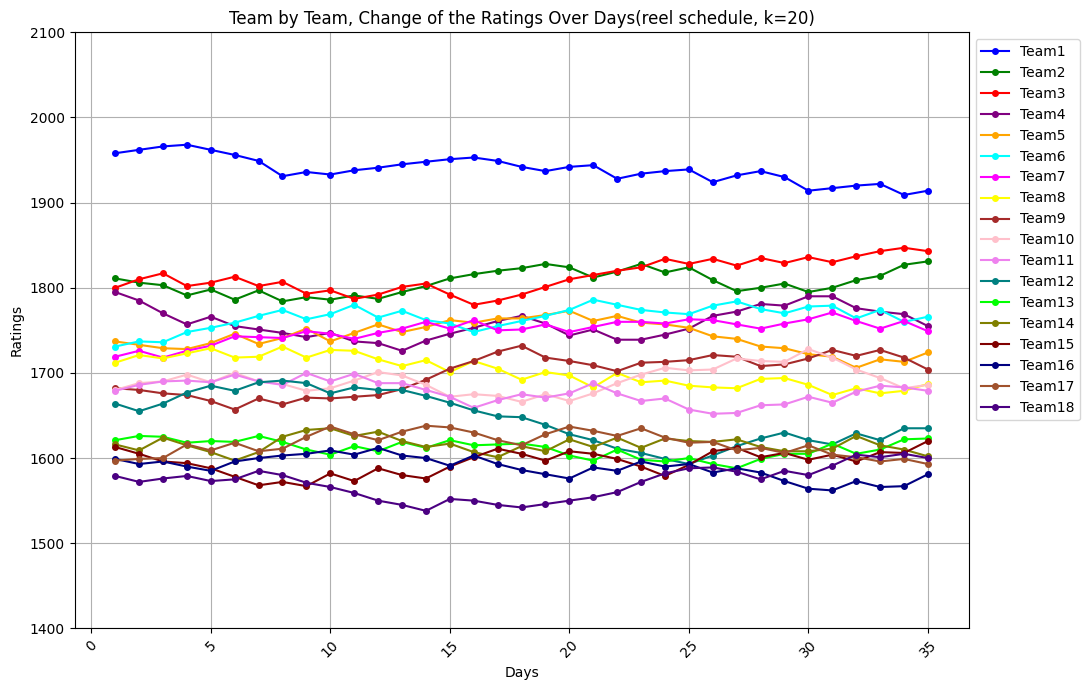

In [39]:
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))
all_days = range(1,36)
team1 = []
team2 = []
team3 = []
columns = df.columns[:]
for i, column in enumerate(columns):

    plt.plot(all_days, df[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Ratings')
plt.title('Team by Team, Change of the Ratings Over Days(reel schedule, k=20)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.ylim(1400,2100)

plt.show()

In [40]:
data2 = [{1:1958.0,2:1811.0,3:1800.0,4:1795.0,5:1737.0,6:1731.0,7:1719.0,8:1712.0,9:1682.0,10:1680.0,11:1679.0,12:1664.0,13:1621.0,14:1616.0,15:1613.0,16:1599.0,17:1597.0, 18:1579.0},
 {1: 1958.0, 2: 1811.0, 3: 1809.856098365819, 4: 1785.143901634181, 5: 1746.8273232835784, 6: 1721.1726767164216, 7: 1718.7985510614512, 8: 1712.2014489385488, 9: 1691.9424360085038, 10: 1670.0575639914962, 11: 1678.568533338977, 12: 1664.4314666610228, 13: 1630.856098365819, 14: 1606.143901634181, 15: 1613.0, 16: 1599.0, 17: 1606.4823813821765, 18: 1569.5176186178235},
 {1: 1963.1902004178082, 2: 1821.2344183844332, 3: 1808.9116028328567, 4: 1770.6637783649019, 5: 1756.0902622832564, 6: 1721.9235983567974, 7: 1718.6086940155874, 8: 1702.3774453443589, 9: 1690.648001006803, 10: 1650.8061138639557, 11: 1688.8272297767257, 12: 1674.7186553525153, 13: 1649.3662819639324, 14: 1607.3879139759522, 15: 1603.7797392533575, 16: 1607.8985994338464, 17: 1604.8885110896717, 18: 1551.6789542832398},
 {1: 1963.6590082655796, 2: 1839.033598772971, 3: 1812.2198454954225, 4: 1749.087547466027, 5: 1763.2226526831057, 6: 1712.4856573841807, 7: 1728.2705830329328, 8: 1693.020153025373, 9: 1689.3009013205378, 10: 1632.8998642892436, 11: 1700.627687602759, 12: 1692.0424274444106, 13: 1666.6112510299936, 14: 1601.1454817407905, 15: 1583.6142271678377, 16: 1605.6803476215628, 17: 1613.3210415493988, 18: 1546.7577241078732},
 {1: 1963.766383571825, 2: 1862.0984455955866, 3: 1823.9002800239355, 4: 1738.9213798416154, 5: 1761.314482974368, 6: 1694.778118669787, 7: 1730.1526866218828, 8: 1695.08349593788, 9: 1697.511813613431, 10: 1616.0687365304898, 11: 1712.0542399805167, 12: 1696.9858840787272, 13: 1672.342326324991, 14: 1604.9724798401976, 15: 1556.466346239629, 16: 1604.050501471436, 17: 1629.1099028686363, 18: 1533.4224958150648},
 {1: 1968.679160180001, 2: 1888.7630111986123, 3: 1841.8067605316235, 4: 1739.9229587372977, 5: 1754.995911004683, 6: 1678.8187552973984, 7: 1724.8959025611778, 8: 1682.418283274582, 9: 1699.61629951266, 10: 1588.6644580160685, 11: 1713.0195414067537, 12: 1701.4426011667613, 13: 1676.2321939078038, 14: 1598.5218424321204, 15: 1546.1020201238523, 16: 1612.3795372346642, 17: 1643.2155246824077, 18: 1533.5052387315327},
 {1: 1966.599409938625, 2: 1898.9135610716876, 3: 1844.0610018018099, 4: 1730.909670124715, 5: 1763.9004442862902, 6: 1672.7214910674497, 7: 1731.058558122263, 8: 1677.7914145943303, 9: 1711.2078239598916, 10: 1577.089875328982, 11: 1727.8220918114675, 12: 1694.2098763462623, 13: 1675.696423879659, 14: 1582.058251993685, 15: 1548.5476362827262, 16: 1610.582571730935, 17: 1642.827757505374, 18: 1537.0021401538468},
 {1: 1968.9260278281488, 2: 1903.840800488421, 3: 1833.2101332452644, 4: 1715.1995533290599, 5: 1780.8047036656308, 6: 1667.4045842775508, 7: 1731.9900786483229, 8: 1673.9622255986217, 9: 1734.4820541985478, 10: 1576.6259569402034, 11: 1745.3188494055935, 12: 1693.8113038543993, 13: 1683.307557781461, 14: 1568.0569415426526, 15: 1540.7213424334163, 16: 1600.1340887207766, 17: 1641.9069297668354, 18: 1533.2968682750939},
 {1: 1972.2722008157598, 2: 1913.2152808789808, 3: 1810.5270050498277, 4: 1712.359855904776, 5: 1783.8927583350037, 6: 1648.880655922311, 7: 1742.897553221524, 8: 1678.758907348234, 9: 1765.283043159571, 10: 1585.5216095567082, 11: 1749.8174779505252, 12: 1689.5130469213077, 13: 1679.8390303326364, 14: 1546.366529778692, 15: 1547.205852044152, 16: 1583.188210710504, 17: 1655.326050932725, 18: 1528.134931136762},
 {1: 1980.1229877010014, 2: 1914.0975059274172, 3: 1798.093284713402, 4: 1699.0283509621672, 5: 1770.6649314042613, 6: 1630.368610222214, 7: 1755.6684331952624, 8: 1672.4647906338587, 9: 1784.860308647026, 10: 1600.099441496935, 11: 1751.9277265714989, 12: 1697.3839257614538, 13: 1679.2577391640561, 14: 1531.422379466513, 15: 1567.900938867799, 16: 1564.5267644209544, 17: 1675.8224974862044, 18: 1519.2893833579758},
 {1: 1989.8839847355682, 2: 1909.1134127347955, 3: 1793.423994789379, 4: 1684.3251760462365, 5: 1768.3058992254485, 6: 1621.512503437614, 7: 1764.9627657668245, 8: 1656.8245815649145, 9: 1800.1547484666885, 10: 1624.0752089885334, 11: 1757.7429708335173, 12: 1695.3058721180146, 13: 1684.8989190379123, 14: 1515.6321500927927, 15: 1579.3678930066455, 16: 1552.8446711114548, 17: 1688.7667581806131, 18: 1505.8584898630475},
 {1: 2001.3641918255896, 2: 1910.2262771406115, 3: 1790.470701049664, 4: 1676.616299979446, 5: 1774.3329248775624, 6: 1614.060033283198, 7: 1776.7175684539186, 8: 1641.6153806459522, 9: 1808.6307158003451, 10: 1641.6870644041041, 11: 1746.532257429469, 12: 1690.40258216436, 13: 1681.3699788944266, 14: 1503.5044494756182, 15: 1582.8783002358605, 16: 1558.6306212111658, 17: 1694.2226916460825, 18: 1499.7379614826264},
 {1: 2012.802234193372, 2: 1903.043999192458, 3: 1791.9293521669763, 4: 1670.8870675138487, 5: 1775.1773303462244, 6: 1620.2852719029343, 7: 1782.5863803053226, 8: 1630.673389845577, 9: 1811.6945725175553, 10: 1658.146944470874, 11: 1733.891549100935, 12: 1689.137923014708, 13: 1666.548062784122, 14: 1502.236452391479, 15: 1589.5318498813328, 16: 1560.8595366711072, 17: 1701.6954923533488, 18: 1491.8725913478254},
 {1: 2025.063070364605, 2: 1899.8536045302806, 3: 1800.1568639935754, 4: 1666.3003557758154, 5: 1779.161403448511, 6: 1637.613985993908, 7: 1794.4684003962166, 8: 1634.086072390672, 9: 1806.3025584233283, 10: 1668.1780297180414, 11: 1711.4207532052105, 12: 1680.8820766524884, 13: 1644.4223144752525, 14: 1497.8933488026294, 15: 1594.3592410685173, 16: 1559.696485647923, 17: 1699.5538263098126, 18: 1493.587608803213},
 {1: 2027.8036705993818, 2: 1899.8976309792238, 3: 1811.218765089761, 4: 1667.9813046929894, 5: 1789.266885830571, 6: 1658.0195587132318, 7: 1810.0221008347462, 8: 1648.5262956113447, 9: 1794.7304229527354, 10: 1669.4037720156573, 11: 1683.3947234575455, 12: 1671.6379868887075, 13: 1622.8806592101398, 14: 1501.3304550465502, 15: 1595.0115787662505, 16: 1561.8069563591566, 17: 1690.5088055787905, 18: 1489.5584273732175},
 {1: 2032.1775157959178, 2: 1899.479790635284, 3: 1818.4513919261872, 4: 1654.4696219214131, 5: 1801.9724839551284, 6: 1685.9449970858884, 7: 1815.3600884725906, 8: 1651.943195232822, 9: 1772.6503943420391, 10: 1670.9595006923487, 11: 1664.3326018157552, 12: 1665.242710854148, 13: 1607.8259858039053, 14: 1517.5775943619965, 15: 1594.1369283430922, 16: 1569.3077882609857, 17: 1684.3423714632313, 18: 1486.8250390372668},
 {1: 2027.5052207955885, 2: 1883.522721716569, 3: 1808.2766554982672, 4: 1655.6701344370754, 5: 1804.456956109488, 6: 1720.3047096433634, 7: 1822.4832536452438, 8: 1668.580856160768, 9: 1762.792842370843, 10: 1662.0003889699412, 11: 1656.7924061989747, 12: 1651.021435431161, 13: 1605.8512690404277, 14: 1525.8943212658978, 15: 1588.4088407344943, 16: 1580.5221179218693, 17: 1689.463044715153, 18: 1479.452825344875},
 {1: 2004.8748884136305, 2: 1856.6071959912551, 3: 1788.996791920325, 4: 1657.4049633953118, 5: 1806.048002797089, 6: 1755.659830063475, 7: 1831.9782574257342, 8: 1695.0575922668543, 9: 1755.9440647011554, 10: 1666.3964138827787, 11: 1642.2617847431095, 12: 1649.3462877607744, 13: 1600.7810359322975, 14: 1550.7290215773744, 15: 1576.2489705298503, 16: 1588.658095273363, 17: 1691.422015635697, 18: 1474.584787689925},
 {1: 1987.018861014266, 2: 1874.4632233906198, 3: 1798.048317578896, 4: 1667.173057652096, 5: 1817.4952447963053, 6: 1763.9330345377048, 7: 1820.531015426518, 8: 1686.7843877926246, 9: 1746.8925390425843, 10: 1667.1154654933293, 11: 1631.0735134366644, 12: 1639.5781935039902, 13: 1611.9693072387427, 14: 1548.5718417371572, 15: 1586.3669933828958, 16: 1578.5400724203175, 17: 1690.7029640251465, 18: 1476.7419675301421},
 {1: 1967.0162077268806, 2: 1898.2932420595089, 3: 1815.5871082669523, 4: 1685.9499867220684, 5: 1831.5693972203878, 6: 1762.7476840450086, 7: 1802.6294976209317, 8: 1669.3996072135014, 9: 1726.9722470489467, 10: 1666.4411451021392, 11: 1621.8763857325373, 12: 1629.9318435427024, 13: 1622.9575451005803, 14: 1537.1949239590563, 15: 1582.1206164405144, 16: 1578.8900904728841, 17: 1701.4072275273422, 18: 1492.0152441980579},
 {1: 1956.7859770980665, 2: 1926.6770886637878, 3: 1824.861801252274, 4: 1702.1808197638636, 5: 1835.249577617536, 6: 1772.379919428425, 7: 1776.7681994539678, 8: 1656.0075727773535, 9: 1708.7209969671933, 10: 1653.9876963432516, 11: 1623.7421289399524, 12: 1611.9176399183848, 13: 1644.160979016641, 14: 1518.3484477109107, 15: 1587.1372042123867, 16: 1566.616966719008, 17: 1709.3387276887904, 18: 1518.1182564282074},
 {1: 1954.284453059317, 2: 1936.5334059385023, 3: 1843.1297465948915, 4: 1725.0720912465847, 5: 1827.5307653414304, 6: 1795.023486584952, 7: 1749.767507826732, 8: 1656.608573408218, 9: 1681.4310400078662, 10: 1652.67300954264, 11: 1622.9020827363215, 12: 1606.2444465916137, 13: 1656.7501863265804, 14: 1505.8715046520792, 15: 1582.6549480039605, 16: 1547.3140405329539, 17: 1705.4687539424183, 18: 1543.7399576629387},
 {1: 1936.9779765918904, 2: 1932.3666802700009, 3: 1871.597460732426, 4: 1759.4597506734601, 5: 1809.976628907989, 6: 1825.4709514915132, 7: 1735.6795407557106, 8: 1665.6881442702784, 9: 1668.2220835679461, 10: 1657.6737534460624, 11: 1630.357883581785, 12: 1610.9413223553358, 13: 1656.5597675672311, 14: 1489.2137071901961, 15: 1570.3609608829663, 16: 1523.2059076907492, 17: 1692.6059727838624, 18: 1556.6415072405975},
 {1: 1930.6546134240975, 2: 1914.7884614860131, 3: 1901.3212347825768, 4: 1802.2929510873719, 5: 1802.2703019888193, 6: 1844.0495626426066, 7: 1717.431438685263, 8: 1664.2924614855176, 9: 1649.3756877468168, 10: 1671.4881408188087, 11: 1642.4299460851562, 12: 1603.9370275777508, 13: 1643.9283724088632, 14: 1468.447173002698, 15: 1570.6799375800251, 16: 1511.138901160001, 17: 1675.1968395134513, 18: 1579.2769485241636},
 {1: 1909.7461633726234, 2: 1905.450848341782, 3: 1933.2092387365744, 4: 1829.2296157800326, 5: 1794.7667729621846, 6: 1853.6658083826333, 7: 1701.274476652633, 8: 1681.0925296012958, 9: 1639.5329705250329, 10: 1682.31068933066, 11: 1640.0886231797715, 12: 1584.9601939707295, 13: 1620.5140505027691, 14: 1465.091945383696, 15: 1582.918670276267, 16: 1514.4928913803444, 17: 1656.7432185667642, 18: 1597.911293054207},
 {1: 1895.8068121660128, 2: 1882.3786304617322, 3: 1962.1340770625868, 4: 1851.499719555116, 5: 1772.9927281748953, 6: 1861.0800520824293, 7: 1687.8924760390341, 8: 1695.3460290465491, 9: 1627.5501331211701, 10: 1704.9764520938527, 11: 1635.4257382544272, 12: 1585.350731951392, 13: 1611.8160597869205, 14: 1466.8971610082638, 15: 1583.5857175890142, 16: 1514.6332344209904, 17: 1630.8771622564313, 18: 1622.7570849291826},
 {1: 1870.050694628077, 2: 1865.905731784478, 3: 1977.2399256460724, 4: 1876.0092639440834, 5: 1748.946313273772, 6: 1860.8368892332953, 7: 1685.3326422118735, 8: 1691.6767273309833, 9: 1627.3649874868227, 10: 1735.7354442410574, 11: 1638.8269632560605, 12: 1576.7632393620224, 13: 1614.5123944004024, 14: 1467.0079718617346, 15: 1576.0164785938784, 16: 1529.5850692586405, 17: 1619.624908608303, 18: 1631.5643548784437},
 {1: 1854.6900171519374, 2: 1847.111464059106, 3: 1991.9938467043773, 4: 1887.0749700891402, 5: 1724.054233578354, 6: 1867.063757661807, 7: 1678.3896685642776, 8: 1686.7086204378977, 9: 1636.268901173913, 10: 1751.093530661389, 11: 1648.0275728620197, 12: 1581.8764527796911, 13: 1624.6694349875454, 14: 1474.189010449392, 15: 1563.1083532655384, 16: 1544.3662643530588, 17: 1599.7631110330956, 18: 1632.55079018746},
 {1: 1845.7245275036064, 2: 1836.2152464423114, 3: 2001.396886512471, 4: 1876.451671339237, 5: 1704.3220809762051, 6: 1875.5553271072642, 7: 1681.2980508728338, 8: 1683.8378817291225, 9: 1643.4184575904876, 10: 1764.0336392541635, 11: 1646.4911652744472, 12: 1582.137673567161, 13: 1629.850982081122, 14: 1498.734084136736, 15: 1551.797602570639, 16: 1546.1797112303054, 17: 1593.1439966327437, 18: 1632.4110151791433},
 {1: 1843.1144183894287, 2: 1833.8477499264125, 3: 2010.281382848791, 4: 1855.3235012897685, 5: 1696.2096137347694, 6: 1875.4398244260253, 7: 1688.7511502342377, 8: 1675.1941483437251, 9: 1658.9324967368518, 10: 1786.237451544064, 11: 1636.0982465820714, 12: 1580.6459707740485, 13: 1629.818611017254, 14: 1529.7894745906092, 15: 1538.164727426819, 16: 1541.5068839124865, 17: 1575.6988073747455, 18: 1637.945540847892},
 {1: 1840.3095542403557, 2: 1834.9819212242194, 3: 2009.5023686815393, 4: 1825.489617334394, 5: 1703.6557651563992, 6: 1858.0582345359328, 7: 1692.456553627028, 8: 1675.8434468114913, 9: 1670.1590505483782, 10: 1788.251290666797, 11: 1630.2541502199588, 12: 1571.8284310474817, 13: 1618.797112403166, 14: 1569.9221890089218, 15: 1543.4140009211685, 16: 1535.1333100250765, 17: 1575.4265485886194, 18: 1649.5164549590727},
 {1: 1843.218336828911, 2: 1839.424201984375, 3: 2011.5995002216148, 4: 1801.1880470566823, 5: 1704.6358524870316, 6: 1831.8156363299486, 7: 1698.601858941161, 8: 1674.8801612808115, 9: 1671.9979747322209, 10: 1782.5770722261393, 11: 1633.327518685453, 12: 1579.5861413927983, 13: 1607.033625999258, 14: 1595.4505081988257, 15: 1551.3347074177095, 16: 1538.3717220994643, 17: 1569.3865550565934, 18: 1658.570579061002},
 {1: 1847.9898799642237, 2: 1852.2880726204971, 3: 2014.0453215037605, 4: 1770.3908716184692, 5: 1704.7983369416297, 6: 1807.1671920257256, 7: 1709.353220768248, 8: 1670.836139422911, 9: 1674.5215197539262, 10: 1783.0029579654222, 11: 1649.8535886735428, 12: 1579.5032648073857, 13: 1592.4275167951391, 14: 1616.0036972372632, 15: 1563.127587004631, 16: 1540.289260284651, 17: 1562.7679923251706, 18: 1654.6335802874037},
 {1: 1844.6256533675635, 2: 1865.5614986434398, 3: 2007.2380720952751, 4: 1755.1730366810707, 5: 1693.7194999459787, 6: 1798.8297491469111, 7: 1723.216890749666, 8: 1655.7938083959818, 9: 1671.1670018419104, 10: 1769.2894227352153, 11: 1671.6050053569977, 12: 1585.3722456445187, 13: 1595.7437809848018, 14: 1621.4183900640396, 15: 1578.7997068342665, 16: 1537.917896538189, 17: 1551.076753224969, 18: 1666.4515877492056},
 {1: 1847.331820218992, 2: 1857.1457210473839, 3: 2003.1450409631502, 4: 1753.3430724592397, 5: 1685.0235960608595, 6: 1797.1223830256035, 7: 1737.348773561901, 8: 1647.3637430563595, 9: 1682.3753822636995, 10: 1748.08705500189, 11: 1683.8951881952069, 12: 1582.8979688637808, 13: 1600.5551965225075, 14: 1620.1877398852407, 15: 1605.0839509014531, 16: 1533.1768013348799, 17: 1542.9992255880818, 18: 1665.917341049771}]


df2 = pd.DataFrame(data2)

nump2 = np.array(df2)
nump2 = np.round(nump2,0)
df2=pd.DataFrame(nump2)
df2.to_excel('dinamik_table.xlsx', index = False)


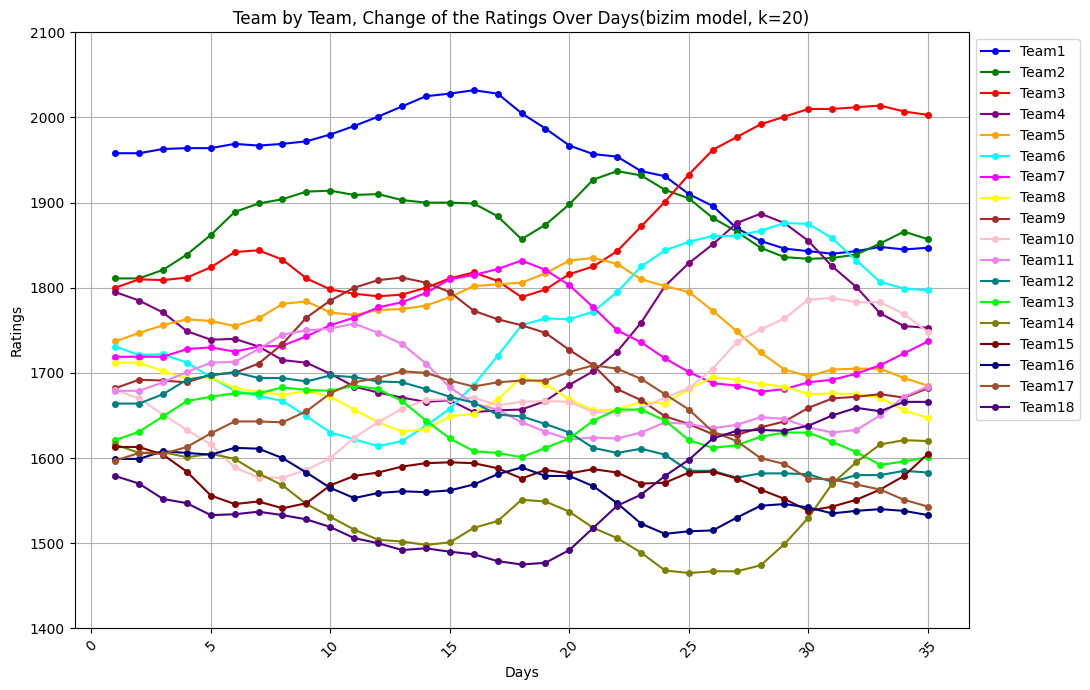

In [41]:
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))

team1 = []
team2 = []
team3 = []
columns2 = df2.columns[:]
for i, column in enumerate(columns2):

    plt.plot(all_days, df2[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Ratings')
plt.title('Team by Team, Change of the Ratings Over Days(bizim model, k=20)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.ylim(1400,2100)
plt.show()

In [42]:
data_minmax =[{1:1958.0,2:1811.0,3:1800.0,4:1795.0,5:1737.0,6:1731.0,7:1719.0,8:1712.0,9:1682.0,10:1680.0,11:1679.0,12:1664.0,13:1621.0,14:1616.0,15:1613.0,16:1599.0,17:1597.0, 18:1579.0},
 {1: 1958.0, 2: 1811.0, 3: 1808.206329937201, 4: 1803.1784880737011, 5: 1728.793670062799, 6: 1722.8215119262989, 7: 1717.430064953105, 8: 1698.805840117105, 9: 1690.039724684613, 10: 1667.1721977608877, 11: 1677.3459623007154, 12: 1665.569935046895, 13: 1622.6540376992846, 14: 1605.5110907775868, 15: 1604.960275315387, 16: 1609.4889092224132, 17: 1610.194159882895, 18: 1591.8278022391123},
 {1: 1954.1252543584474, 2: 1817.078681362751, 3: 1819.8343847734782, 4: 1817.2017998742956, 5: 1728.282892220526, 6: 1722.0001854264567, 7: 1713.238217618813, 8: 1673.803663380987, 9: 1705.556354624822, 10: 1663.3434557349913, 11: 1669.4888825540406, 12: 1660.972920586921, 13: 1616.2977108170162, 14: 1587.3190995708164, 15: 1609.8668835907333, 16: 1622.0846038380366, 17: 1615.4481792031886, 18: 1597.056830463679},
 {1: 1957.2967489992357, 2: 1830.0280141384765, 3: 1837.4002774346443, 4: 1823.6353121458967, 5: 1728.2240042508952, 6: 1729.2315408743582, 7: 1702.820272798142, 8: 1650.4412658313447, 9: 1713.0729812180502, 10: 1668.247832696253, 11: 1662.0340581130179, 12: 1656.8036114789033, 13: 1620.594770064083, 14: 1570.3910423598848, 15: 1604.143494627512, 16: 1625.8575634302267, 17: 1610.8826972673526, 18: 1601.8945122717237},
 {1: 1955.1985354194958, 2: 1837.892108191168, 3: 1838.3245436047725, 4: 1815.9790518744398, 5: 1733.861060860524, 6: 1741.9561904944164, 7: 1707.3379964992441, 8: 1637.9932744246214, 9: 1728.378794168064, 10: 1676.8499697127731, 11: 1670.4657730136155, 12: 1644.6970868411352, 13: 1614.467482132239, 14: 1549.2502071343565, 15: 1588.7831740080721, 16: 1638.1596138069137, 17: 1615.9766971140486, 18: 1597.4284407001005},
 {1: 1957.8433123605437, 2: 1841.0011630109316, 3: 1844.2047999726512, 4: 1804.6498550508907, 5: 1734.297976377956, 6: 1738.6914925044557, 7: 1720.4676604829767, 8: 1629.3643179259077, 9: 1738.3315070050667, 10: 1675.0461488921032, 11: 1681.9536368850024, 12: 1629.99583397923, 13: 1619.972569644509, 14: 1542.137738651561, 15: 1589.812413913698, 16: 1637.7772176218764, 17: 1625.1024231348947, 18: 1582.349932585746},
 {1: 1964.6110522088338, 2: 1848.654330376129, 3: 1849.7429263662057, 4: 1780.6828389910509, 5: 1721.0449259616928, 6: 1744.0047236640585, 7: 1728.3338542203496, 8: 1625.3543466903675, 9: 1742.244686479067, 10: 1673.5505795216268, 11: 1683.02001866799, 12: 1632.7679839781024, 13: 1623.4409452829084, 14: 1548.0094670557105, 15: 1604.94171873385, 16: 1632.5813536996673, 17: 1619.8817256970071, 18: 1570.1325224053835},
 {1: 1974.2980099012648, 2: 1859.5390716096795, 3: 1859.036305687238, 4: 1766.892567766121, 5: 1717.7232943286801, 6: 1757.9819904567182, 7: 1730.3104442940569, 8: 1620.6997682670667, 9: 1736.3627398128656, 10: 1680.7183059006427, 11: 1690.3300393249992, 12: 1627.345308331219, 13: 1620.0253923457424, 14: 1545.9136676569606, 15: 1609.107502775872, 16: 1624.24283869801, 17: 1611.025481348928, 18: 1561.4472714939361},
 {1: 1982.8855032069237, 2: 1872.5824510633386, 3: 1850.845010378729, 4: 1751.9902532779906, 5: 1714.1145116996288, 6: 1775.0897329488444, 7: 1731.7512065733847, 8: 1610.4057743348212, 9: 1732.0028086783316, 10: 1687.5006526169946, 11: 1696.571644173896, 12: 1630.9185382745704, 13: 1624.4827729380997, 14: 1535.8196267497362, 15: 1608.6468558118622, 16: 1621.3958617122494, 17: 1619.9843383448915, 18: 1546.012457215708},
 {1: 1993.262584266087, 2: 1893.0155549268954, 3: 1835.3720187991983, 4: 1740.555807906116, 5: 1711.0287758110223, 6: 1776.771615777467, 7: 1744.1257738693198, 8: 1612.5821355835424, 9: 1729.5033365831125, 10: 1689.9005478340327, 11: 1702.200658431503, 12: 1633.2867818274117, 13: 1626.8793526379739, 14: 1519.7447887071644, 15: 1616.5453022574395, 16: 1608.281030967903, 17: 1634.0214921171541, 18: 1525.9224416966574},
 {1: 2004.221111875134, 2: 1903.5008598666802, 3: 1826.422039258106, 4: 1716.5179847848844, 5: 1705.6946374204463, 6: 1777.9854741794256, 7: 1760.0532410428502, 8: 1626.9218415520586, 9: 1737.1642692067423, 10: 1683.377688324287, 11: 1693.7622090241705, 12: 1634.891621952978, 13: 1634.4392854468454, 14: 1522.1972795442061, 15: 1616.7014748610382, 16: 1600.3671276657476, 17: 1642.1195085680747, 18: 1506.6623454263251},
 {1: 2015.499040384495, 2: 1916.6641397138615, 3: 1808.3082641512474, 4: 1694.2610413261923, 5: 1709.4407927719803, 6: 1789.9606453645665, 7: 1779.7458957429728, 8: 1629.331588067473, 9: 1737.8218825558451, 10: 1687.617595627054, 11: 1679.4435206141052, 12: 1633.4347825184366, 13: 1631.5332342455397, 14: 1528.6876452649624, 15: 1604.410864544353, 16: 1585.6207791531383, 17: 1656.2460035568456, 18: 1504.9722843969319},
 {1: 2017.1378257592896, 2: 1909.628016425874, 3: 1794.9158049322928, 4: 1683.5296819570594, 5: 1711.6301819353957, 6: 1795.3092291258483, 7: 1793.849443940382, 8: 1648.0208324725577, 9: 1738.421936694387, 10: 1694.9158955193777, 11: 1668.6846611257831, 12: 1640.8628630009448, 13: 1636.4665128181055, 14: 1532.8379909438568, 15: 1587.4867021062146, 16: 1574.8914124924513, 17: 1666.2470116925522, 18: 1498.163997057628},
 {1: 2011.032210107941, 2: 1910.8536948932806, 3: 1773.2787152326541, 4: 1686.609955227768, 5: 1725.421148446168, 6: 1786.5698101844523, 7: 1797.185928890967, 8: 1669.4990686763263, 9: 1750.4747293122548, 10: 1690.3379173566123, 11: 1666.5649251069556, 12: 1652.703017001858, 13: 1640.4570449083124, 14: 1528.4782042043398, 15: 1576.3237468256823, 16: 1567.2652810925667, 17: 1672.3491136066154, 18: 1487.5954889252455},
 {1: 2007.635299712634, 2: 1912.0142344688027, 3: 1765.266962130333, 4: 1680.772324825788, 5: 1743.5278113242575, 6: 1773.8318656564013, 7: 1805.071749627401, 8: 1676.3748405533406, 9: 1756.9501903506882, 10: 1696.9421899399435, 11: 1655.996697525426, 12: 1658.6417578045634, 13: 1637.9832871363387, 14: 1531.5603436518172, 15: 1567.4886302382943, 16: 1564.482337523317, 17: 1678.9281751321237, 18: 1479.5313023985298},
 {1: 2006.5194663960976, 2: 1905.0810318442245, 3: 1764.3728493373665, 4: 1668.8014964916154, 5: 1764.1094346103282, 6: 1764.788515898564, 7: 1812.7964637655914, 8: 1690.7862385667609, 9: 1748.3318272572515, 10: 1701.7560993952698, 11: 1661.7345597468407, 12: 1653.4236376682434, 13: 1636.4125960985662, 14: 1541.6051732870453, 15: 1556.866488879331, 16: 1561.1804840883583, 17: 1683.8083392186993, 18: 1470.6252974498464},
 {1: 1987.0771620484948, 2: 1886.3688003714806, 3: 1751.556158710166, 4: 1660.8978214539748, 5: 1792.0736331951414, 6: 1765.3177155745052, 7: 1824.3394554334134, 8: 1712.471602426716, 9: 1735.3844674779061, 10: 1693.8297757960158, 11: 1652.936728642842, 12: 1661.4706928146047, 13: 1629.0205993249508, 14: 1567.07336252195, 15: 1549.6075982388854, 16: 1571.9809223149925, 17: 1680.9522281118884, 18: 1470.6412755420722},
 {1: 1972.8096680521733, 2: 1859.7112245398582, 3: 1749.4807963967194, 4: 1655.5818597117377, 5: 1798.583981303314, 6: 1778.9587936359437, 7: 1835.532653535842, 8: 1726.5753097628224, 9: 1738.0724496050893, 10: 1685.8816231599899, 11: 1644.8705557553862, 12: 1657.782674491208, 13: 1617.8736342499546, 14: 1581.0660072255787, 15: 1547.8069959448717, 16: 1583.498555815957, 17: 1688.9412839252307, 18: 1469.971932888324},
 {1: 1956.6838608515852, 2: 1875.8370317404463, 3: 1757.7557524722874, 4: 1663.5364003733328, 5: 1805.449330540144, 6: 1777.787392519564, 7: 1832.4955271928268, 8: 1729.6124361058376, 9: 1739.243850721469, 10: 1679.0162739231598, 11: 1632.147323946891, 12: 1655.5603972467568, 13: 1620.0959114944058, 14: 1577.9731584644585, 15: 1560.530227753367, 16: 1575.544015154362, 17: 1680.6663278496626, 18: 1473.0647816494443},
 {1: 1949.1047447424965, 2: 1898.0668230101157, 3: 1775.8923087645026, 4: 1680.5540917472194, 5: 1804.1796826135128, 6: 1766.3628892800493, 7: 1822.7504310865168, 8: 1742.7161792585546, 9: 1730.1225422294694, 10: 1679.7689440028507, 11: 1632.4743941206707, 12: 1644.0864212347017, 13: 1630.6569352811425, 14: 1567.775999708703, 15: 1563.9782578229047, 16: 1555.4353191769462, 17: 1660.4897623625488, 18: 1488.5842735570952},
 {1: 1939.2430308317525, 2: 1904.6229221683818, 3: 1805.6615717564948, 4: 1708.5374086579825, 5: 1807.3624776233696, 6: 1748.7792003762424, 7: 1810.0372646515077, 8: 1741.8927900032863, 9: 1729.0319652740982, 10: 1683.8646466340977, 11: 1624.3312327640317, 12: 1641.6327263396433, 13: 1637.526116833399, 14: 1560.836573617279, 15: 1555.6579861604753, 16: 1530.1709701799525, 17: 1649.480288345005, 18: 1514.330827783001},
 {1: 1937.758266761789, 2: 1917.6417373147144, 3: 1825.3011253032587, 4: 1730.4207483841478, 5: 1807.9810502219245, 6: 1742.3706387841476, 7: 1791.280136005736, 8: 1749.3615755086178, 9: 1729.6471754998313, 10: 1678.5954833234016, 11: 1614.0143825013179, 12: 1632.6364248470218, 13: 1645.677912618751, 14: 1544.0276335743715, 15: 1541.1856528156704, 16: 1519.257979182701, 17: 1646.703273699347, 18: 1539.1388036532514},
 {1: 1922.4297390017134, 2: 1933.805730495479, 3: 1838.0327502628056, 4: 1737.50506426955, 5: 1816.80642756265, 6: 1733.1524426459896, 7: 1766.6460316617076, 8: 1771.0892981227694, 9: 1725.1477558542354, 10: 1685.0683930496916, 11: 1608.8031632156958, 12: 1632.6383099718644, 13: 1657.0702545420766, 14: 1519.3957416597987, 15: 1538.743663244213, 16: 1503.2383046029083, 17: 1631.1950718694181, 18: 1572.2318579674338},
 {1: 1896.174417018585, 2: 1952.5338227846287, 3: 1858.2062102006516, 4: 1759.1499971898152, 5: 1813.9235347820463, 6: 1722.0701737802096, 7: 1754.5571103686825, 8: 1783.1065087993125, 9: 1730.9401571212304, 10: 1680.7235283682476, 11: 1610.8968875306653, 12: 1620.337025991969, 13: 1658.8930893279442, 14: 1512.034623610134, 15: 1549.2948944388324, 16: 1482.368277258854, 17: 1605.0514811461178, 18: 1602.7382602820742},
 {1: 1882.3962432547953, 2: 1952.4671557688498, 3: 1881.0008552443594, 4: 1791.6549548615112, 5: 1807.1931829236903, 6: 1725.8032195423036, 7: 1738.006804266269, 8: 1781.2509832349976, 9: 1729.8320178660001, 10: 1674.3141609371974, 11: 1618.821657686584, 12: 1621.0249837908793, 13: 1664.5548357986281, 14: 1498.6086930911783, 15: 1562.3023830694688, 16: 1460.155807384627, 17: 1586.8239819825812, 18: 1616.7880792960798},
 {1: 1856.742799214164, 2: 1936.7609713081354, 3: 1905.9562068282976, 4: 1802.592084771317, 5: 1801.693359296765, 6: 1745.2398956466461, 7: 1730.2889168425093, 8: 1774.0252139254758, 9: 1734.2715656418884, 10: 1683.8460772491708, 11: 1639.3235311353046, 12: 1609.0975702857859, 13: 1653.9907438911712, 14: 1501.0156650403464, 15: 1565.9077776734825, 16: 1458.3485738826037, 17: 1566.6280702541435, 18: 1627.2709771127932},
 {1: 1844.3925281172815, 2: 1907.9345702941928, 3: 1931.926605195828, 4: 1803.450532958628, 5: 1783.3431117874384, 6: 1753.2413804981786, 7: 1716.5771444076438, 8: 1773.470135334652, 9: 1732.024446020965, 10: 1707.09661112759, 11: 1669.4751910480497, 12: 1609.3156378909887, 13: 1635.088413437126, 14: 1508.8920254273391, 15: 1563.788892256002, 16: 1463.4368166769189, 17: 1543.6395499065604, 18: 1645.9064076146176},
 {1: 1828.4903935510579, 2: 1880.320106955627, 3: 1955.4991126075695, 4: 1803.1133994609454, 5: 1764.7334641630093, 6: 1761.700990854182, 7: 1709.5873333303773, 8: 1769.3899919143887, 9: 1726.069188820997, 10: 1717.7165892253572, 11: 1697.2526766150488, 12: 1614.9138322971385, 13: 1608.1172560960526, 14: 1510.7201017722316, 15: 1568.0566815650027, 16: 1473.7713313319978, 17: 1540.7800585373784, 18: 1662.767490901639},
 {1: 1819.8761231555588, 2: 1869.4754077862149, 3: 1970.3284420225107, 4: 1811.329396988963, 5: 1742.8653139892463, 6: 1752.2808419109626, 7: 1709.1158251462944, 8: 1760.5326372878728, 9: 1709.491889296891, 10: 1727.1562294409605, 11: 1725.2089285070135, 12: 1611.3949040818084, 13: 1584.1510335415126, 14: 1529.0964803528466, 15: 1565.3045009210914, 16: 1494.483805151163, 17: 1545.8962736525914, 18: 1665.0119667664983},
 {1: 1818.1491659967285, 2: 1865.2102443996382, 3: 1985.02358972416, 4: 1813.641812239528, 5: 1732.877443800816, 6: 1749.8690985253297, 7: 1710.9351688383585, 8: 1743.5173268544188, 9: 1704.2216171779214, 10: 1739.4166161107353, 11: 1741.3373572641165, 12: 1605.1156207896533, 13: 1560.445279174145, 14: 1553.4868462310249, 15: 1558.3780463634248, 16: 1505.907237489097, 17: 1545.7370451404647, 18: 1659.7304838804391},
 {1: 1822.566158185214, 2: 1864.8764537427842, 3: 1988.838724915289, 4: 1801.926240602979, 5: 1721.7932176741326, 6: 1757.4974612958795, 7: 1702.9267403607328, 8: 1716.572876724504, 9: 1707.8557140270216, 10: 1728.329277884935, 11: 1746.4936020323828, 12: 1592.9566646609521, 13: 1563.789065093124, 14: 1574.4636962418685, 15: 1566.5410879163392, 16: 1529.5694520909426, 17: 1543.1117302699015, 18: 1662.8918362810175},
 {1: 1828.6468786489856, 2: 1866.863071515947, 3: 1992.8070150195092, 4: 1799.3396270614808, 5: 1720.0202854173249, 6: 1757.2008014130527, 7: 1708.6265124051897, 8: 1689.655249011507, 9: 1696.336978406409, 10: 1730.5432260110108, 11: 1738.9987467176727, 12: 1584.0114203178107, 13: 1562.9720564945558, 14: 1584.2944752037636, 15: 1577.2218860764483, 16: 1540.7650108990024, 17: 1556.0542348384652, 18: 1658.6425245418645},
 {1: 1835.6672613889702, 2: 1870.3925440608123, 3: 1999.0328506815306, 4: 1793.9613181104248, 5: 1718.0776811090366, 6: 1766.253606125214, 7: 1721.0314196414463, 8: 1673.9419457519612, 9: 1691.814646267724, 10: 1738.0026093185666, 11: 1720.1698127679463, 12: 1572.2261845177713, 13: 1577.5108112133, 14: 1586.7693954836789, 15: 1580.2845973981664, 16: 1545.3728547360333, 17: 1555.0435413404152, 18: 1647.446920087002},
 {1: 1842.8753910584114, 2: 1875.8128043365634, 3: 1995.5086666126244, 4: 1794.339404305866, 5: 1708.3269747034387, 6: 1779.9825299648162, 7: 1734.659400130894, 8: 1651.9581435591144, 9: 1687.4527281744674, 10: 1742.4554511812764, 11: 1709.603660414068, 12: 1559.1617033111131, 13: 1599.0194565959468, 14: 1584.7275888690858, 15: 1590.3939563571691, 16: 1544.9444985513585, 17: 1550.0231224761694, 18: 1641.7545193976161},
 {1: 1850.3897648930176, 2: 1862.569184543277, 3: 1994.4532091862532, 4: 1778.9767347413347, 5: 1688.6353281225709, 6: 1793.3124520141234, 7: 1740.3710652068246, 8: 1640.6564573804492, 9: 1687.1441084683227, 10: 1732.5237438523827, 11: 1701.8305908897821, 12: 1565.655166026251, 13: 1606.66029362334, 14: 1598.3574036016348, 15: 1613.2502920847132, 16: 1543.3011601007358, 17: 1543.7423366321023, 18: 1651.1707086328845}]

df_minmax = pd.DataFrame(data_minmax)

nump_minmax = np.array(df_minmax)
nump_minmax = np.round(nump_minmax,0)
df_minmax=pd.DataFrame(nump_minmax)
df_minmax.to_excel('dinamik_table.xlsx', index = False)


In [43]:
data_minmax =[{i: 1600 for i in range(1, 19)},
 {1: 1600.0, 2: 1600.0, 3: 1610.0, 4: 1590.0, 5: 1610.0, 6: 1590.0, 7: 1600.0, 8: 1600.0, 9: 1590.0, 10: 1590.0, 11: 1610.0, 12: 1610.0, 13: 1600.0, 14: 1590.0, 15: 1590.0, 16: 1610.0, 17: 1600.0, 18: 1610.0},
 {1: 1610.0, 2: 1590.0, 3: 1629.4249887221547, 4: 1580.5750112778453, 5: 1619.4249887221547, 6: 1580.5750112778453, 7: 1610.0, 8: 1610.0, 9: 1590.5750112778453, 10: 1570.5750112778453, 11: 1619.4249887221547, 12: 1619.4249887221547, 13: 1590.0, 14: 1580.5750112778453, 15: 1580.5750112778453, 16: 1619.4249887221547, 17: 1590.0, 18: 1609.4249887221547},
 {1: 1619.4249887221547, 2: 1580.5750112778453, 3: 1656.6640242515323, 4: 1581.9636811511507, 5: 1628.3191684316298, 6: 1561.6967193593612, 7: 1610.2304249995009, 8: 1619.4249887221547, 9: 1591.3713018222275, 10: 1563.3359757484677, 11: 1628.5724295707748, 12: 1628.0522066288925, 13: 1580.5750112778453, 14: 1561.6803607297766, 15: 1581.4116826491781, 16: 1628.3037514792363, 17: 1569.7695750004991, 18: 1608.6286981777725},
 {1: 1636.986988222027, 2: 1582.005516405177, 3: 1670.41373485292, 4: 1573.1518445821714, 5: 1646.448585837482, 6: 1544.179718467847, 7: 1621.0858888634725, 8: 1638.2935610501697, 9: 1583.1873985264087, 10: 1566.0533672087627, 11: 1648.7049863705304, 12: 1626.2585046249794, 13: 1581.450251085488, 14: 1534.4643809510328, 15: 1571.3556727829837, 16: 1626.1647875065485, 17: 1551.0445407371647, 18: 1598.7502719248346},
 {1: 1662.1500267664344, 2: 1593.3894259549086, 3: 1692.448856739316, 4: 1575.0586878208098, 5: 1653.1756244054363, 6: 1518.5531279407742, 7: 1631.1423269594397, 8: 1666.1429790565328, 9: 1566.894881442438, 10: 1556.9534100139092, 11: 1656.8709825449198, 12: 1616.4535102155899, 13: 1582.0267507522424, 14: 1520.188716294865, 15: 1570.1996437291139, 16: 1624.7298077363914, 17: 1523.7146174516706, 18: 1589.9066241752082},
 {1: 1693.372469681413, 2: 1603.8700344335011, 3: 1701.4589414912602, 4: 1586.8301358698066, 5: 1649.61277673177, 6: 1496.9406870933205, 7: 1639.9258587421496, 8: 1702.1844038047884, 9: 1552.118681665617, 10: 1545.929468880656, 11: 1653.5873645600827, 12: 1609.621993504373, 13: 1572.0089091954849, 14: 1507.4641431095301, 15: 1555.947364803578, 16: 1635.2490456064754, 17: 1511.2399118293097, 18: 1582.6378089968837},
 {1: 1720.3883280626683, 2: 1623.508717986001, 3: 1710.4456276361286, 4: 1597.8242919453173, 5: 1659.6166935228032, 6: 1489.7934496748398, 7: 1658.2049908381646, 8: 1721.7175992449445, 9: 1538.6187483838041, 10: 1545.4267268315032, 11: 1641.5503481335268, 12: 1594.9476214166618, 13: 1551.1050538359782, 14: 1507.3824946266225, 15: 1531.7942582187397, 16: 1643.258288822311, 17: 1500.9142131233382, 18: 1563.502547696647},
 {1: 1743.6365460290651, 2: 1637.4345385354507, 3: 1727.271484320576, 4: 1607.2956830436642, 5: 1668.5957812857107, 6: 1494.3419703959603, 7: 1672.523980842789, 8: 1739.6666177647596, 9: 1516.190745743017, 10: 1546.2427689064143, 11: 1632.6582750650466, 12: 1592.4676381059182, 13: 1542.8676719982398, 14: 1496.4138993273068, 15: 1502.179109370252, 16: 1642.5723703812048, 17: 1502.7450742797387, 18: 1534.8958446048864},
 {1: 1772.0177372695523, 2: 1658.9807216837162, 3: 1747.7118529831669, 4: 1607.6541269697454, 5: 1685.427087922463, 6: 1507.1275065603274, 7: 1676.3193961072232, 8: 1739.857802110836, 9: 1507.2852176098224, 10: 1545.992997199054, 11: 1632.358071654415, 12: 1585.0058797131621, 13: 1535.5691680244868, 14: 1479.488358738953, 15: 1467.5877372150085, 16: 1633.3527556107579, 17: 1518.405491769882, 18: 1499.8580908574284},
 {1: 1802.282250154546, 2: 1686.1937311889658, 3: 1748.234960580304, 4: 1619.821950185635, 5: 1683.6146961081172, 6: 1530.9060693604915, 7: 1669.2145055209696, 8: 1726.4498522623037, 9: 1510.5450819877044, 10: 1533.2317713046043, 11: 1621.4336711215312, 12: 1586.8454338156462, 13: 1517.9943466437703, 14: 1457.9439214369413, 15: 1455.423552511707, 16: 1621.7352079508705, 17: 1544.9081226884323, 18: 1483.2208751774601},
 {1: 1829.3525700670318, 2: 1718.3795073930821, 3: 1737.613454438834, 4: 1614.4670676673027, 5: 1668.1148643686602, 6: 1559.6384640713477, 7: 1669.6843231435844, 8: 1700.7358796765695, 9: 1527.5323411205475, 10: 1518.1291893925006, 11: 1600.2768741930408, 12: 1587.6670892755715, 13: 1505.0375109402285, 14: 1455.9627227296783, 15: 1462.1973975905098, 16: 1601.8968088346955, 17: 1575.7742134459475, 18: 1467.5397216508682},
 {1: 1844.286985480938, 2: 1729.7627567397951, 3: 1733.5192713785113, 4: 1609.1214827405845, 5: 1668.30870711549, 6: 1586.2044767685213, 7: 1673.2806795204358, 8: 1677.9932630948915, 9: 1544.7211184861033, 10: 1520.815130253807, 11: 1571.340996749575, 12: 1594.038090876399, 13: 1492.7656698079104, 14: 1449.9204019210383, 15: 1467.642601380101, 16: 1587.2587851642165, 17: 1598.739715084311, 18: 1450.2798674373714},
 {1: 1860.442456958034, 2: 1744.4639703594387, 3: 1716.3806213929524, 4: 1601.1894301367056, 5: 1672.7429585994544, 6: 1618.3013128732516, 7: 1679.3606164026637, 8: 1648.1525594823404, 9: 1568.2749312398216, 10: 1537.3562643342066, 11: 1557.0483371013752, 12: 1586.822779462202, 13: 1497.069997449334, 14: 1441.2227404277774, 15: 1467.6197067367925, 16: 1563.503864899258, 17: 1608.412980271425, 18: 1431.6344718729672},
 {1: 1875.7842441901878, 2: 1741.7377007852035, 3: 1690.6145418239382, 4: 1585.3895023542295, 5: 1680.8387322321896, 6: 1654.1007468868404, 7: 1690.5591063168677, 8: 1627.8131223433588, 9: 1598.495104722899, 10: 1546.671060815602, 11: 1544.096218053414, 12: 1591.8731147804617, 13: 1495.19118336641, 14: 1435.3215069321684, 15: 1470.5720373998881, 16: 1551.9767119060814, 17: 1606.7418029019768, 18: 1412.2235621882833},
 {1: 1869.65906057627, 2: 1734.7031334722792, 3: 1678.0091190408987, 4: 1575.3382021957407, 5: 1686.4450329357928, 6: 1669.2663774893092, 7: 1706.7995724393045, 8: 1620.9560647107705, 9: 1617.7376043976108, 10: 1553.378658798371, 11: 1540.555628352446, 12: 1585.3750714834496, 13: 1487.3098619637854, 14: 1450.1724694104578, 15: 1468.5658685574062, 16: 1542.6336317738917, 17: 1614.533761182502, 18: 1398.5608812197147},
 {1: 1866.9377110337882, 2: 1723.4452011116623, 3: 1669.5206695926104, 4: 1573.8194822684118, 5: 1698.0062050944707, 6: 1685.7916416071823, 7: 1717.7533536306767, 8: 1625.7010440995368, 9: 1630.2128211223917, 10: 1558.2413052436782, 11: 1536.7554748921475, 12: 1572.1015337236586, 13: 1483.6185820942621, 14: 1467.371534114768, 15: 1465.8899017766034, 16: 1529.6769448109342, 17: 1611.4824440210627, 18: 1383.674149762155},
 {1: 1857.1943500595464, 2: 1719.9033859571523, 3: 1663.7736654324078, 4: 1566.6710120973937, 5: 1701.9110435180407, 6: 1697.0946764019748, 7: 1730.8784181733758, 8: 1622.688869440862, 9: 1638.4580202488041, 10: 1565.5134993677784, 11: 1534.4141779235579, 12: 1563.2568035078248, 13: 1489.3285415479263, 14: 1479.0294557271159, 15: 1460.6019671852864, 16: 1520.9287253414113, 17: 1609.2770050586885, 18: 1379.0763830108533},
 {1: 1863.710833977096, 2: 1729.3859871513773, 3: 1674.7297915731237, 4: 1577.8912008363845, 5: 1692.4284423238157, 6: 1686.1385502612588, 7: 1724.3619342558263, 8: 1633.142430682413, 9: 1628.004459007253, 10: 1575.4485473531104, 11: 1544.0262301982857, 12: 1553.3217555224928, 13: 1489.0321968253054, 14: 1479.3258004497368, 15: 1448.2976107330633, 16: 1511.3166730666835, 17: 1598.0568163196976, 18: 1391.3807394630765},
 {1: 1852.8527377199985, 2: 1755.3756408981712, 3: 1696.0082262447618, 4: 1589.3231892134397, 5: 1673.2672209890843, 6: 1686.0312487821088, 7: 1707.2204649083733, 8: 1641.4100992455922, 9: 1617.3001047463938, 10: 1583.9019571500228, 11: 1553.998134705598, 12: 1552.7631958362917, 13: 1497.2650697080499, 14: 1477.4353983502442, 15: 1428.1617378648573, 16: 1493.44991844866, 17: 1589.0615136403226, 18: 1405.1741415480305},
 {1: 1850.1261817975828, 2: 1785.839650905433, 3: 1709.118153985072, 4: 1589.3512620104493, 5: 1654.5190692978936, 6: 1694.9393616609054, 7: 1683.7657666156842, 8: 1639.7540194635912, 9: 1609.1203820136977, 10: 1602.339868004528, 11: 1573.5824976754047, 12: 1549.3470253347639, 13: 1507.0967343175837, 14: 1464.3441650541304, 15: 1421.632575199216, 16: 1465.154072404757, 17: 1570.6751842653835, 18: 1429.294029993924},
 {1: 1855.004992806832, 2: 1799.4382621906918, 3: 1733.302431501474, 4: 1579.1880503894135, 5: 1649.4691781738754, 6: 1696.8835327127138, 7: 1651.7160942915123, 8: 1627.2515123244125, 9: 1589.7781651676794, 10: 1630.1592369651858, 11: 1599.8447086566084, 12: 1533.930479987099, 13: 1503.346627672537, 14: 1465.7158728872637, 15: 1426.9783508672597, 16: 1429.4413193146622, 17: 1566.5583940531267, 18: 1461.9927900376533},
 {1: 1854.4166580848548, 2: 1798.227287080002, 3: 1758.6272534719228, 4: 1578.6344503914754, 5: 1648.8706467718025, 6: 1712.045691808902, 7: 1624.0953359852056, 8: 1616.5112723272598, 9: 1583.1860167481063, 10: 1650.5850858617857, 11: 1610.655741328617, 12: 1507.7201850784231, 13: 1492.0966082488524, 14: 1455.5602743097395, 15: 1443.1672450369135, 16: 1411.6579188037958, 17: 1571.4201399108606, 18: 1482.5221887514815},
 {1: 1839.3969657192924, 2: 1801.9815581597243, 3: 1787.0704489360105, 4: 1565.7193508422342, 5: 1640.8395610357156, 6: 1732.14923144396, 7: 1594.1451581906147, 8: 1607.7294221637455, 9: 1573.1957497099984, 10: 1683.346556225041, 11: 1619.665325374335, 12: 1495.5701439530308, 13: 1469.70192109698, 14: 1460.0253710642364, 15: 1448.6051622087384, 16: 1409.5823337536128, 17: 1581.9937323750314, 18: 1489.282007747699},
 {1: 1820.5793731295998, 2: 1799.9803454478779, 3: 1816.1205426374527, 4: 1549.9141458569468, 5: 1637.6396998122264, 6: 1757.6083702911887, 7: 1575.8976225613528, 8: 1596.4912620304772, 9: 1561.6999543672027, 10: 1702.1596036474587, 11: 1632.2673799006125, 12: 1493.0203374399514, 13: 1444.6733798179432, 14: 1465.7811787444882, 15: 1458.759303500305, 16: 1403.4459992899592, 17: 1577.2531826894988, 18: 1506.7083188354586},
 {1: 1807.711964122467, 2: 1786.1452808473944, 3: 1842.5790950377977, 4: 1544.6276738962329, 5: 1633.2218627501263, 6: 1772.4271770211265, 7: 1567.8384475759237, 8: 1589.3951313687444, 9: 1558.2016369836258, 10: 1730.8299043189982, 11: 1640.2253765035637, 12: 1488.2135943923622, 13: 1418.2723585432725, 14: 1482.6501151359703, 15: 1458.1897760385689, 16: 1392.7750902118323, 17: 1560.2827219187598, 18: 1526.412793333234},
 {1: 1783.1298789236523, 2: 1779.1971809946301, 3: 1856.4655690303648, 4: 1537.3159724158227, 5: 1642.6564112734086, 6: 1781.2718821308376, 7: 1568.7234411019074, 8: 1599.7944602248715, 9: 1553.991970686207, 10: 1740.78454865204, 11: 1648.8780268543808, 12: 1481.1722662274444, 13: 1401.3580838860187, 14: 1486.8893823656592, 15: 1464.93921484101, 16: 1378.66406721646, 17: 1552.9116702322483, 18: 1541.8559729430372},
 {1: 1769.995607929531, 2: 1779.170235379909, 3: 1872.4476857988898, 4: 1540.2450850841144, 5: 1645.7224896520647, 6: 1790.6817336598779, 7: 1564.5042623804911, 8: 1602.8048861069612, 9: 1558.6405171290323, 10: 1743.655218916121, 11: 1649.7546827583328, 12: 1466.6233588657842, 13: 1386.2199618546963, 14: 1493.8180576830882, 15: 1461.3033132631567, 16: 1372.9821570085974, 17: 1552.800318741176, 18: 1548.6304277881766},
 {1: 1745.3351350075586, 2: 1787.5894714509395, 3: 1876.21023567741, 4: 1557.5154155339098, 5: 1638.4083142074328, 6: 1781.335443726683, 7: 1566.1017551242987, 8: 1611.4719425615574, 9: 1551.9702658933913, 10: 1741.535519593776, 11: 1660.5132964897384, 12: 1467.5572886154603, 13: 1383.2272040476316, 14: 1515.4856684265387, 15: 1452.3018021055257, 16: 1378.4283454374659, 17: 1540.0790997115198, 18: 1544.9337963891628},
 {1: 1730.7419401692214, 2: 1774.9417714808353, 3: 1883.433966414571, 4: 1581.7149057401296, 5: 1627.112216934493, 6: 1781.8961379500581, 7: 1579.8666651603542, 8: 1605.0497745495243, 9: 1555.654945619532, 10: 1724.6950614684781, 11: 1654.2817514985288, 12: 1460.6731082801289, 13: 1387.4422331522983, 14: 1526.4853710372986, 15: 1464.5535098771395, 16: 1379.970395070946, 17: 1524.1245923326414, 18: 1557.3616532638216},
 {1: 1724.5173041609382, 2: 1769.3750339150276, 3: 1891.1510087545744, 4: 1594.9561284333956, 5: 1625.3836469934597, 6: 1775.5324617236981, 7: 1595.478149533365, 8: 1585.0404044123836, 9: 1564.2945567282127, 10: 1716.2540360298262, 11: 1632.3838963164853, 12: 1450.0758816837317, 13: 1407.628487384813, 14: 1531.2035063987253, 15: 1470.3732753493605, 16: 1397.6771544934893, 17: 1509.0230198414206, 18: 1559.6520478470932},
 {1: 1724.0909347771724, 2: 1767.1585311059187, 3: 1899.0423856108946, 4: 1607.6159072901137, 5: 1630.9875923789964, 6: 1765.5690271685678, 7: 1614.6272101187922, 8: 1577.814529877524, 9: 1567.6134913811545, 10: 1702.658232558842, 11: 1603.1988251445794, 12: 1437.7040592463438, 13: 1420.121938277719, 14: 1530.3857021281888, 15: 1489.3609317197397, 16: 1417.5751344455641, 17: 1491.8579150344924, 18: 1552.617651735397},
 {1: 1726.925019940064, 2: 1767.650798995684, 3: 1896.8284259549898, 4: 1625.8578698170181, 5: 1623.7652614126714, 6: 1743.0851250269125, 7: 1633.3769724907875, 8: 1559.2116371419033, 9: 1583.3607050728947, 10: 1679.815574329152, 11: 1592.7315330844558, 12: 1445.038529168007, 13: 1442.958848148237, 14: 1522.2735065279885, 15: 1497.9086603862934, 16: 1429.00754679858, 17: 1473.8233534994433, 18: 1556.3806322049181},
 {1: 1731.3187605325795, 2: 1754.0254975443163, 3: 1895.8687730481588, 4: 1650.1696175837335, 5: 1616.1685789180092, 6: 1730.4516372222947, 7: 1642.4214790071342, 8: 1548.148281587734, 9: 1595.6705752263879, 10: 1670.476933558446, 11: 1591.966120828566, 12: 1444.5189159400084, 13: 1455.5552729819235, 14: 1511.7598147701683, 15: 1507.587937126819, 16: 1434.2975438760711, 17: 1460.719756276299, 18: 1558.874503971351},
 {1: 1740.01660473122, 2: 1748.4788009487163, 3: 1896.0211374749192, 4: 1664.2404635409973, 5: 1597.3696641812903, 6: 1716.4712694428356, 7: 1648.1100706178306, 8: 1540.5285313983436, 9: 1596.9745806438991, 10: 1644.1514641175038, 11: 1590.4385363319332, 12: 1459.1071956151604, 13: 1484.2549603708994, 14: 1506.796946858628, 15: 1519.6717426195812, 16: 1436.8653415681686, 17: 1449.4388371145747, 18: 1561.0638524234992}]


df_minmax = pd.DataFrame(data_minmax)

nump_minmax = np.array(df_minmax)
nump_minmax = np.round(nump_minmax,0)
df_minmax=pd.DataFrame(nump_minmax)
df_minmax.to_excel('dinamik_table.xlsx', index = False)


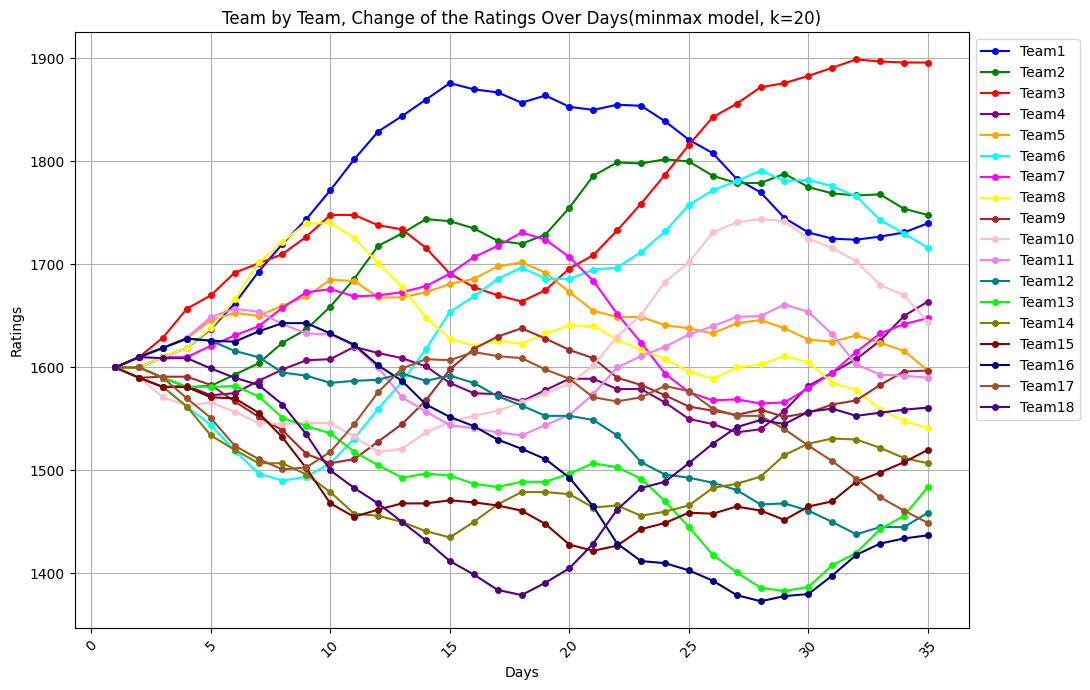

In [44]:
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))

team1 = []
team2 = []
team3 = []
columns_minmax = df_minmax.columns[:]
for i, column in enumerate(columns_minmax):

    plt.plot(all_days, df_minmax[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Ratings')
plt.title('Team by Team, Change of the Ratings Over Days(minmax model, k=20)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
#plt.ylim(1400,2100)

plt.show()

In [45]:
point = [{1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579},
 {1: 1961, 2: 1811, 3: 1803, 4: 1795, 5: 1737, 6: 1734, 7: 1722, 8: 1712, 9: 1683, 10: 1683, 11: 1680, 12: 1664, 13: 1624, 14: 1616, 15: 1613, 16: 1602, 17: 1597, 18: 1582},
 {1: 1964, 2: 1811, 3: 1806, 4: 1795, 5: 1740, 6: 1734, 7: 1725, 8: 1712, 9: 1686, 10: 1683, 11: 1683, 12: 1664, 13: 1624, 14: 1619, 15: 1613, 16: 1605, 17: 1600, 18: 1582},
 {1: 1964, 2: 1811, 3: 1809, 4: 1798, 5: 1740, 6: 1734, 7: 1728, 8: 1715, 9: 1686, 10: 1686, 11: 1683, 12: 1667, 13: 1624, 14: 1622, 15: 1613, 16: 1608, 17: 1600, 18: 1585},
 {1: 1964, 2: 1814, 3: 1812, 4: 1801, 5: 1740, 6: 1737, 7: 1728, 8: 1715, 9: 1686, 10: 1689, 11: 1683, 12: 1670, 13: 1624, 14: 1625, 15: 1616, 16: 1611, 17: 1600, 18: 1585},
 {1: 1967, 2: 1814, 3: 1815, 4: 1804, 5: 1740, 6: 1737, 7: 1728, 8: 1718, 9: 1686, 10: 1692, 11: 1683, 12: 1670, 13: 1627, 14: 1625, 15: 1619, 16: 1611, 17: 1603, 18: 1588},
 {1: 1970, 2: 1814, 3: 1818, 4: 1807, 5: 1740, 6: 1737, 7: 1731, 8: 1718, 9: 1686, 10: 1692, 11: 1686, 12: 1673, 13: 1627, 14: 1625, 15: 1622, 16: 1614, 17: 1606, 18: 1588},
 {1: 1970, 2: 1817, 3: 1821, 4: 1807, 5: 1743, 6: 1737, 7: 1731, 8: 1718, 9: 1689, 10: 1695, 11: 1689, 12: 1676, 13: 1627, 14: 1625, 15: 1625, 16: 1617, 17: 1606, 18: 1588},
 {1: 1973, 2: 1817, 3: 1824, 4: 1810, 5: 1746, 6: 1737, 7: 1731, 8: 1718, 9: 1689, 10: 1698, 11: 1689, 12: 1676, 13: 1627, 14: 1625, 15: 1628, 16: 1620, 17: 1609, 18: 1591},
 {1: 1973, 2: 1820, 3: 1824, 4: 1813, 5: 1749, 6: 1737, 7: 1734, 8: 1718, 9: 1689, 10: 1698, 11: 1692, 12: 1679, 13: 1630, 14: 1628, 15: 1628, 16: 1623, 17: 1609, 18: 1591},
 {1: 1973, 2: 1820, 3: 1827, 4: 1813, 5: 1749, 6: 1740, 7: 1734, 8: 1721, 9: 1689, 10: 1698, 11: 1695, 12: 1682, 13: 1633, 14: 1628, 15: 1631, 16: 1623, 17: 1612, 18: 1594},
 {1: 1976, 2: 1823, 3: 1827, 4: 1816, 5: 1752, 6: 1743, 7: 1737, 8: 1721, 9: 1689, 10: 1698, 11: 1698, 12: 1685, 13: 1633, 14: 1628, 15: 1634, 16: 1623, 17: 1612, 18: 1594},
 {1: 1979, 2: 1826, 3: 1830, 4: 1819, 5: 1755, 6: 1743, 7: 1737, 8: 1721, 9: 1692, 10: 1698, 11: 1698, 12: 1685, 13: 1636, 14: 1631, 15: 1637, 16: 1623, 17: 1612, 18: 1594},
 {1: 1979, 2: 1826, 3: 1830, 4: 1822, 5: 1758, 6: 1743, 7: 1740, 8: 1724, 9: 1695, 10: 1698, 11: 1701, 12: 1685, 13: 1636, 14: 1631, 15: 1640, 16: 1626, 17: 1612, 18: 1597},
 {1: 1979, 2: 1826, 3: 1830, 4: 1825, 5: 1761, 6: 1743, 7: 1743, 8: 1724, 9: 1698, 10: 1701, 11: 1701, 12: 1688, 13: 1639, 14: 1634, 15: 1640, 16: 1626, 17: 1612, 18: 1600},
 {1: 1979, 2: 1826, 3: 1833, 4: 1825, 5: 1761, 6: 1746, 7: 1746, 8: 1727, 9: 1698, 10: 1704, 11: 1704, 12: 1688, 13: 1642, 14: 1634, 15: 1643, 16: 1629, 17: 1612, 18: 1600},
 {1: 1979, 2: 1826, 3: 1836, 4: 1825, 5: 1764, 6: 1749, 7: 1746, 8: 1727, 9: 1701, 10: 1704, 11: 1704, 12: 1691, 13: 1645, 14: 1634, 15: 1646, 16: 1632, 17: 1615, 18: 1600},
 {1: 1982, 2: 1829, 3: 1839, 4: 1828, 5: 1767, 6: 1752, 7: 1749, 8: 1730, 9: 1701, 10: 1707, 11: 1704, 12: 1691, 13: 1645, 14: 1634, 15: 1646, 16: 1632, 17: 1615, 18: 1600},
 {1: 1982, 2: 1829, 3: 1842, 4: 1831, 5: 1770, 6: 1752, 7: 1749, 8: 1733, 9: 1701, 10: 1710, 11: 1704, 12: 1694, 13: 1648, 14: 1637, 15: 1646, 16: 1632, 17: 1615, 18: 1603},
 {1: 1982, 2: 1832, 3: 1845, 4: 1831, 5: 1773, 6: 1752, 7: 1752, 8: 1733, 9: 1704, 10: 1713, 11: 1704, 12: 1694, 13: 1651, 14: 1637, 15: 1649, 16: 1635, 17: 1615, 18: 1603},
 {1: 1982, 2: 1835, 3: 1845, 4: 1834, 5: 1776, 6: 1752, 7: 1752, 8: 1736, 9: 1707, 10: 1713, 11: 1704, 12: 1697, 13: 1654, 14: 1637, 15: 1652, 16: 1635, 17: 1615, 18: 1606},
 {1: 1982, 2: 1835, 3: 1845, 4: 1837, 5: 1776, 6: 1755, 7: 1755, 8: 1736, 9: 1710, 10: 1716, 11: 1707, 12: 1697, 13: 1654, 14: 1640, 15: 1655, 16: 1635, 17: 1615, 18: 1609},
 {1: 1985, 2: 1838, 3: 1845, 4: 1837, 5: 1776, 6: 1758, 7: 1758, 8: 1739, 9: 1710, 10: 1716, 11: 1707, 12: 1700, 13: 1657, 14: 1643, 15: 1655, 16: 1635, 17: 1618, 18: 1609},
 {1: 1985, 2: 1838, 3: 1845, 4: 1837, 5: 1779, 6: 1761, 7: 1761, 8: 1739, 9: 1713, 10: 1719, 11: 1710, 12: 1700, 13: 1660, 14: 1643, 15: 1658, 16: 1638, 17: 1618, 18: 1609},
 {1: 1985, 2: 1841, 3: 1845, 4: 1837, 5: 1782, 6: 1764, 7: 1761, 8: 1742, 9: 1716, 10: 1722, 11: 1710, 12: 1703, 13: 1660, 14: 1643, 15: 1661, 16: 1638, 17: 1618, 18: 1612},
 {1: 1985, 2: 1841, 3: 1848, 4: 1840, 5: 1785, 6: 1764, 7: 1761, 8: 1742, 9: 1719, 10: 1725, 11: 1710, 12: 1703, 13: 1663, 14: 1646, 15: 1661, 16: 1641, 17: 1621, 18: 1612},
 {1: 1985, 2: 1841, 3: 1848, 4: 1840, 5: 1785, 6: 1764, 7: 1764, 8: 1745, 9: 1722, 10: 1728, 11: 1710, 12: 1706, 13: 1666, 14: 1649, 15: 1661, 16: 1644, 17: 1621, 18: 1615},
 {1: 1985, 2: 1841, 3: 1848, 4: 1840, 5: 1785, 6: 1767, 7: 1767, 8: 1748, 9: 1722, 10: 1731, 11: 1710, 12: 1706, 13: 1669, 14: 1652, 15: 1664, 16: 1647, 17: 1621, 18: 1618},
 {1: 1985, 2: 1841, 3: 1848, 4: 1843, 5: 1788, 6: 1770, 7: 1767, 8: 1751, 9: 1725, 10: 1731, 11: 1713, 12: 1706, 13: 1669, 14: 1652, 15: 1664, 16: 1650, 17: 1624, 18: 1621},
 {1: 1985, 2: 1841, 3: 1848, 4: 1843, 5: 1788, 6: 1773, 7: 1770, 8: 1751, 9: 1725, 10: 1731, 11: 1716, 12: 1709, 13: 1672, 14: 1655, 15: 1664, 16: 1653, 17: 1627, 18: 1624},
 {1: 1985, 2: 1841, 3: 1851, 4: 1843, 5: 1788, 6: 1776, 7: 1770, 8: 1751, 9: 1728, 10: 1734, 11: 1716, 12: 1709, 13: 1675, 14: 1658, 15: 1667, 16: 1656, 17: 1627, 18: 1627},
 {1: 1985, 2: 1844, 3: 1851, 4: 1846, 5: 1791, 6: 1779, 7: 1773, 8: 1751, 9: 1731, 10: 1737, 11: 1719, 12: 1709, 13: 1675, 14: 1658, 15: 1667, 16: 1656, 17: 1627, 18: 1630},
 {1: 1985, 2: 1847, 3: 1854, 4: 1846, 5: 1794, 6: 1782, 7: 1773, 8: 1754, 9: 1734, 10: 1740, 11: 1719, 12: 1712, 13: 1675, 14: 1661, 15: 1667, 16: 1656, 17: 1627, 18: 1630},
 {1: 1985, 2: 1850, 3: 1857, 4: 1849, 5: 1797, 6: 1782, 7: 1773, 8: 1754, 9: 1734, 10: 1740, 11: 1722, 12: 1715, 13: 1678, 14: 1661, 15: 1670, 16: 1656, 17: 1630, 18: 1630},
 {1: 1988, 2: 1853, 3: 1860, 4: 1852, 5: 1800, 6: 1785, 7: 1776, 8: 1757, 9: 1734, 10: 1743, 11: 1722, 12: 1715, 13: 1678, 14: 1661, 15: 1670, 16: 1656, 17: 1630, 18: 1630}]


In [46]:
df_point = pd.DataFrame(point)

nump_point = np.array(df_point)
nump_point = np.round(nump_point,0)
df_point=pd.DataFrame(nump_point)


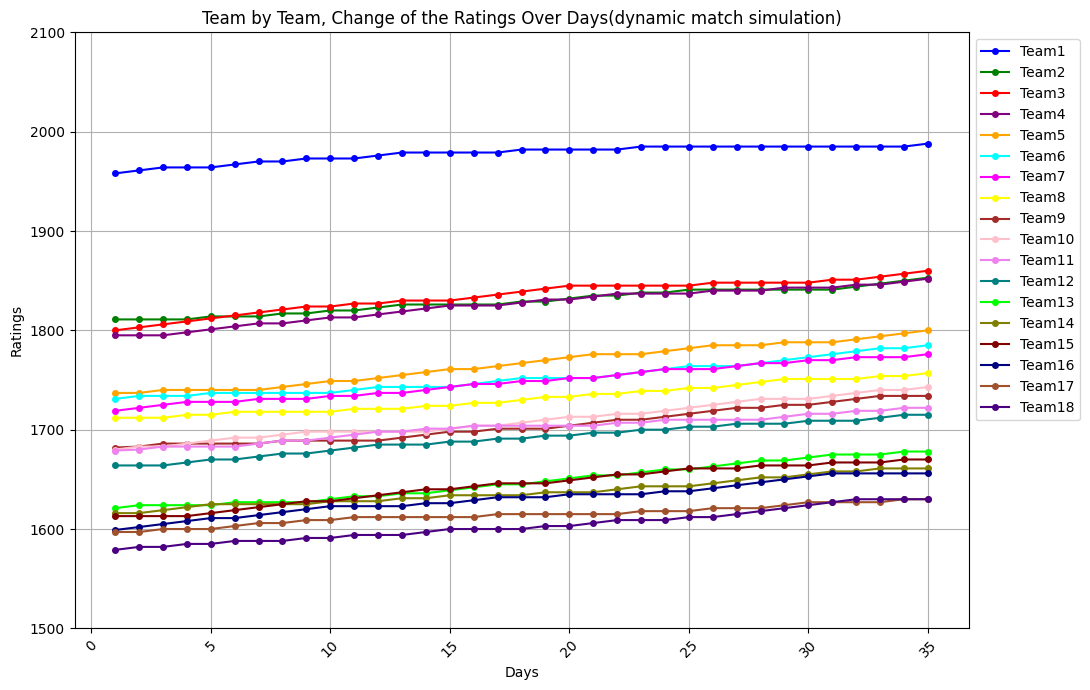

In [54]:
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))

team1 = []
team2 = []
team3 = []
columns_minmax = df_point.columns[:]
for i, column in enumerate(columns_minmax):

    plt.plot(all_days, df_point[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Ratings')
plt.title('Team by Team, Change of the Ratings Over Days(dynamic match simulation)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.ylim(1500,2100)

plt.show()

In [55]:
point1 = [{1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579},
{1: 1961, 2: 1812, 3: 1803, 4: 1795, 5: 1737, 6: 1734, 7: 1722, 8: 1715, 9: 1683, 10: 1683, 11: 1682, 12: 1664, 13: 1622, 14: 1616, 15: 1613, 16: 1599, 17: 1598, 18: 1579},
{1: 1964, 2: 1813, 3: 1806, 4: 1795, 5: 1738, 6: 1735, 7: 1722, 8: 1716, 9: 1683, 10: 1684, 11: 1683, 12: 1667, 13: 1623, 14: 1619, 15: 1613, 16: 1600, 17: 1599, 18: 1580},
{1: 1967, 2: 1813, 3: 1806, 4: 1795, 5: 1739, 6: 1738, 7: 1725, 8: 1719, 9: 1684, 10: 1687, 11: 1684, 12: 1670, 13: 1623, 14: 1619, 15: 1613, 16: 1600, 17: 1602, 18: 1581},
{1: 1968, 2: 1816, 3: 1809, 4: 1798, 5: 1742, 6: 1741, 7: 1728, 8: 1720, 9: 1684, 10: 1687, 11: 1685, 12: 1673, 13: 1624, 14: 1619, 15: 1613, 16: 1600, 17: 1602, 18: 1581},
{1: 1969, 2: 1816, 3: 1812, 4: 1798, 5: 1745, 6: 1742, 7: 1731, 8: 1720, 9: 1684, 10: 1690, 11: 1688, 12: 1673, 13: 1625, 14: 1619, 15: 1613, 16: 1603, 17: 1605, 18: 1582},
{1: 1970, 2: 1819, 3: 1812, 4: 1799, 5: 1745, 6: 1745, 7: 1732, 8: 1721, 9: 1687, 10: 1690, 11: 1688, 12: 1676, 13: 1626, 14: 1622, 15: 1613, 16: 1604, 17: 1605, 18: 1585},
{1: 1970, 2: 1819, 3: 1815, 4: 1800, 5: 1748, 6: 1748, 7: 1733, 8: 1724, 9: 1687, 10: 1691, 11: 1689, 12: 1677, 13: 1626, 14: 1625, 15: 1614, 16: 1605, 17: 1606, 18: 1585},
{1: 1973, 2: 1822, 3: 1815, 4: 1800, 5: 1751, 6: 1748, 7: 1736, 8: 1724, 9: 1690, 10: 1691, 11: 1692, 12: 1678, 13: 1626, 14: 1628, 15: 1614, 16: 1606, 17: 1609, 18: 1585},
{1: 1974, 2: 1823, 3: 1816, 4: 1803, 5: 1751, 6: 1751, 7: 1737, 8: 1727, 9: 1691, 10: 1692, 11: 1692, 12: 1678, 13: 1626, 14: 1629, 15: 1617, 16: 1607, 17: 1612, 18: 1585},
{1: 1977, 2: 1826, 3: 1816, 4: 1803, 5: 1754, 6: 1754, 7: 1737, 8: 1728, 9: 1692, 10: 1695, 11: 1695, 12: 1681, 13: 1629, 14: 1629, 15: 1617, 16: 1607, 17: 1612, 18: 1585},
{1: 1980, 2: 1827, 3: 1819, 4: 1804, 5: 1757, 6: 1754, 7: 1740, 8: 1728, 9: 1693, 10: 1698, 11: 1695, 12: 1681, 13: 1629, 14: 1630, 15: 1620, 16: 1610, 17: 1612, 18: 1585},
{1: 1983, 2: 1830, 3: 1822, 4: 1804, 5: 1757, 6: 1757, 7: 1743, 8: 1728, 9: 1696, 10: 1698, 11: 1696, 12: 1682, 13: 1632, 14: 1630, 15: 1620, 16: 1610, 17: 1615, 18: 1585},
{1: 1986, 2: 1833, 3: 1825, 4: 1807, 5: 1760, 6: 1757, 7: 1746, 8: 1731, 9: 1699, 10: 1698, 11: 1696, 12: 1682, 13: 1632, 14: 1630, 15: 1620, 16: 1610, 17: 1618, 18: 1585},
{1: 1989, 2: 1836, 3: 1825, 4: 1810, 5: 1763, 6: 1758, 7: 1746, 8: 1731, 9: 1702, 10: 1698, 11: 1696, 12: 1682, 13: 1635, 14: 1631, 15: 1623, 16: 1610, 17: 1618, 18: 1588},
{1: 1992, 2: 1839, 3: 1825, 4: 1813, 5: 1764, 6: 1758, 7: 1749, 8: 1734, 9: 1705, 10: 1699, 11: 1696, 12: 1682, 13: 1635, 14: 1631, 15: 1626, 16: 1613, 17: 1618, 18: 1588},
{1: 1993, 2: 1840, 3: 1828, 4: 1816, 5: 1767, 6: 1761, 7: 1749, 8: 1734, 9: 1708, 10: 1700, 11: 1699, 12: 1682, 13: 1636, 14: 1631, 15: 1629, 16: 1613, 17: 1618, 18: 1588},
{1: 1994, 2: 1843, 3: 1831, 4: 1819, 5: 1768, 6: 1764, 7: 1750, 8: 1734, 9: 1711, 10: 1700, 11: 1700, 12: 1683, 13: 1637, 14: 1634, 15: 1629, 16: 1613, 17: 1618, 18: 1588},
{1: 1995, 2: 1846, 3: 1834, 4: 1819, 5: 1769, 6: 1767, 7: 1753, 8: 1737, 9: 1711, 10: 1703, 11: 1701, 12: 1683, 13: 1637, 14: 1634, 15: 1629, 16: 1613, 17: 1621, 18: 1589},
{1: 1998, 2: 1847, 3: 1837, 4: 1819, 5: 1772, 6: 1770, 7: 1753, 8: 1738, 9: 1711, 10: 1703, 11: 1702, 12: 1683, 13: 1637, 14: 1637, 15: 1632, 16: 1613, 17: 1624, 18: 1590},
{1: 2001, 2: 1847, 3: 1840, 4: 1822, 5: 1772, 6: 1773, 7: 1756, 8: 1738, 9: 1712, 10: 1706, 11: 1705, 12: 1683, 13: 1637, 14: 1637, 15: 1632, 16: 1616, 17: 1624, 18: 1591},
{1: 2001, 2: 1850, 3: 1843, 4: 1822, 5: 1775, 6: 1774, 7: 1759, 8: 1741, 9: 1712, 10: 1709, 11: 1705, 12: 1683, 13: 1640, 14: 1640, 15: 1632, 16: 1616, 17: 1624, 18: 1592},
{1: 2004, 2: 1853, 3: 1846, 4: 1823, 5: 1775, 6: 1774, 7: 1760, 8: 1741, 9: 1715, 10: 1712, 11: 1705, 12: 1683, 13: 1640, 14: 1640, 15: 1632, 16: 1619, 17: 1627, 18: 1595},
{1: 2007, 2: 1853, 3: 1849, 4: 1826, 5: 1776, 6: 1775, 7: 1761, 8: 1742, 9: 1716, 10: 1715, 11: 1706, 12: 1683, 13: 1640, 14: 1643, 15: 1632, 16: 1619, 17: 1627, 18: 1598},
{1: 2010, 2: 1856, 3: 1850, 4: 1829, 5: 1777, 6: 1776, 7: 1764, 8: 1742, 9: 1717, 10: 1716, 11: 1706, 12: 1683, 13: 1641, 14: 1643, 15: 1635, 16: 1620, 17: 1627, 18: 1599},
{1: 2010, 2: 1856, 3: 1853, 4: 1832, 5: 1777, 6: 1779, 7: 1765, 8: 1743, 9: 1720, 10: 1717, 11: 1706, 12: 1686, 13: 1641, 14: 1644, 15: 1638, 16: 1620, 17: 1628, 18: 1600},
{1: 2013, 2: 1856, 3: 1853, 4: 1835, 5: 1778, 6: 1782, 7: 1766, 8: 1744, 9: 1721, 10: 1720, 11: 1707, 12: 1689, 13: 1641, 14: 1645, 15: 1639, 16: 1621, 17: 1628, 18: 1600},
{1: 2016, 2: 1859, 3: 1856, 4: 1838, 5: 1778, 6: 1782, 7: 1766, 8: 1747, 9: 1721, 10: 1721, 11: 1710, 12: 1692, 13: 1644, 14: 1645, 15: 1639, 16: 1621, 17: 1629, 18: 1600},
{1: 2017, 2: 1862, 3: 1857, 4: 1839, 5: 1779, 6: 1783, 7: 1769, 8: 1748, 9: 1722, 10: 1722, 11: 1711, 12: 1693, 13: 1645, 14: 1645, 15: 1640, 16: 1621, 17: 1629, 18: 1603},
{1: 2017, 2: 1862, 3: 1860, 4: 1842, 5: 1779, 6: 1786, 7: 1772, 8: 1748, 9: 1725, 10: 1725, 11: 1714, 12: 1693, 13: 1646, 14: 1646, 15: 1640, 16: 1621, 17: 1632, 18: 1603},
{1: 2020, 2: 1865, 3: 1861, 4: 1843, 5: 1780, 6: 1787, 7: 1775, 8: 1748, 9: 1728, 10: 1725, 11: 1714, 12: 1693, 13: 1649, 14: 1647, 15: 1641, 16: 1621, 17: 1632, 18: 1606},
{1: 2023, 2: 1868, 3: 1864, 4: 1843, 5: 1780, 6: 1787, 7: 1775, 8: 1751, 9: 1728, 10: 1725, 11: 1717, 12: 1696, 13: 1649, 14: 1650, 15: 1641, 16: 1624, 17: 1632, 18: 1609},
{1: 2026, 2: 1871, 3: 1867, 4: 1844, 5: 1783, 6: 1790, 7: 1775, 8: 1751, 9: 1731, 10: 1725, 11: 1720, 12: 1696, 13: 1650, 14: 1650, 15: 1644, 16: 1624, 17: 1632, 18: 1609},
{1: 2026, 2: 1874, 3: 1870, 4: 1845, 5: 1784, 6: 1790, 7: 1778, 8: 1752, 9: 1731, 10: 1725, 11: 1721, 12: 1699, 13: 1653, 14: 1650, 15: 1645, 16: 1625, 17: 1633, 18: 1610},
{1: 2029, 2: 1877, 3: 1871, 4: 1845, 5: 1787, 6: 1793, 7: 1778, 8: 1755, 9: 1731, 10: 1726, 11: 1721, 12: 1700, 13: 1654, 14: 1650, 15: 1648, 16: 1628, 17: 1633, 18: 1610}]

In [49]:
df_point1 = pd.DataFrame(point1)

nump_point1 = np.array(df_point1)
nump_point1 = np.round(nump_point1,0)
df_point1=pd.DataFrame(nump_point1)


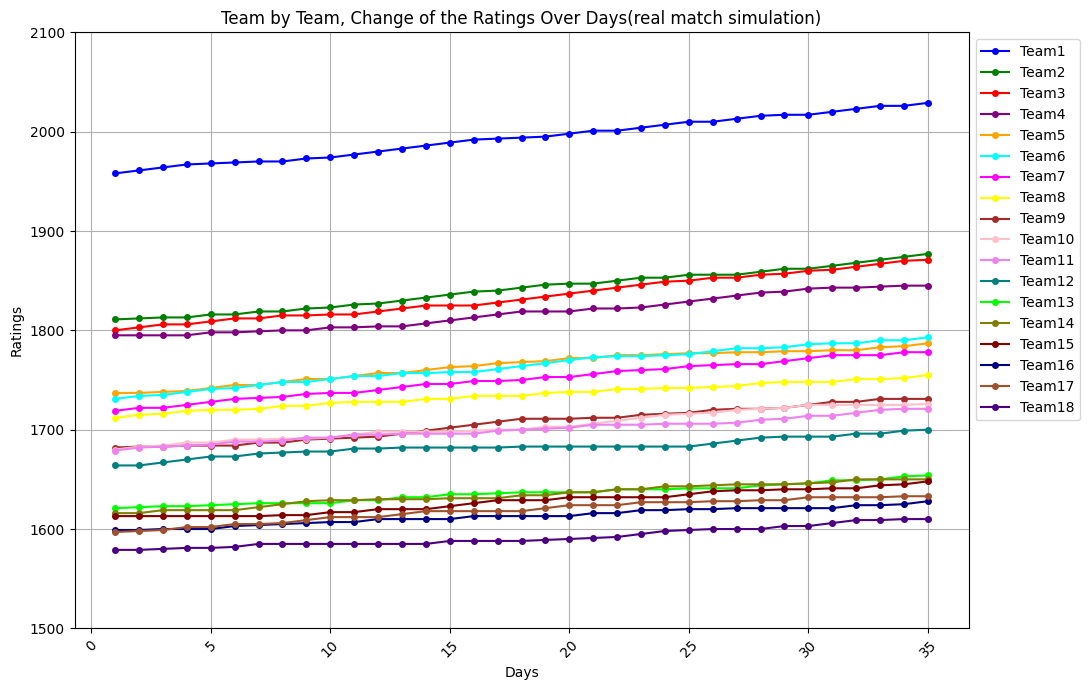

In [56]:
colors = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'violet', 'teal', 'lime', 'olive', 'maroon',
    'navy', 'sienna', 'indigo'
]


plt.figure(figsize=(11,7))

team1 = []
team2 = []
team3 = []
columns_minmax = df_point1.columns[:]
for i, column in enumerate(columns_minmax):

    plt.plot(all_days, df_point1[column], marker='o',markersize= 4, linestyle='-', color=colors[i], label='Team' + str(column+1))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.xlabel('Days')
plt.ylabel('Ratings')
plt.title('Team by Team, Change of the Ratings Over Days(real match simulation)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.ylim(1500,2100)

plt.show()